# COMP9417 - Group Project - EDA
### Yining Liu z5466010
 <span style="color:lightgray; font-size:1.2em">1. Data preprocessing</span><br>
<span style="color:lightgray; font-size:1.2em">2. Classification</span><br>
<span style="color:lightgray; font-size:1.2em">3. Regression</span><br>

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import matplotlib

## 1. Data preprocessing

### 1.1 Load data

In [305]:
x_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv').squeeze()
x_train_range = x_train.describe()
y_train_range = y_train.describe()

In [306]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.617940,-0.391980,0.13278,0.032551,0.55201,0.83393,-0.837550,-0.874060,0.43930,0.268260,...,-0.45454,0.36452,1.575300,-0.620320,-0.25371,-0.447750,-0.038273,-0.019938,-0.195500,0.428830
1,0.333860,-1.549100,1.67050,0.793560,0.80251,-0.07206,-0.068276,3.302400,0.52045,0.685720,...,-0.36913,1.74080,1.286600,-0.013396,-1.53930,0.833540,0.472610,0.513030,-0.743140,1.219900
2,0.040399,-0.608070,1.62080,-0.355970,0.12105,1.35250,0.373200,1.111700,0.35894,-0.344100,...,-1.40230,-0.24763,0.507050,0.708220,-0.60083,0.911040,0.009979,-0.475990,-0.094731,-0.008521
3,1.723600,0.195290,1.03880,-3.009100,-0.33222,0.91067,0.666690,0.717250,3.05850,1.489900,...,-1.21540,-0.25284,-1.307800,-0.445660,0.27918,0.264670,-0.149360,1.492900,-1.176700,-1.854500
4,-1.032300,1.900100,-1.46010,0.383710,-0.51039,0.74481,-0.914660,-0.865880,-0.34426,0.869650,...,1.32230,0.06020,-1.079000,-0.617050,1.18450,-0.210630,-0.105870,-0.412040,1.409700,0.133350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.821000,-0.016804,0.36978,-1.652500,1.32370,-0.67655,-1.238000,-0.764210,0.16283,-0.240030,...,-1.25470,-0.76602,1.453600,1.954500,0.47550,-1.824700,-0.227030,1.879700,-1.123800,1.309600
9996,-0.636390,-0.403470,0.81521,-0.665990,-2.16210,2.03190,0.278910,0.169180,0.52821,-0.217570,...,0.42273,-0.07438,-0.958710,-0.030666,-0.43114,0.075285,-0.892370,-0.677320,-1.330200,-0.809090
9997,0.773410,0.157330,-0.82969,-2.569100,1.33060,-0.45354,0.154800,0.010011,0.79613,0.606680,...,-1.15410,-1.75520,-1.645100,0.316050,-0.49966,0.997910,-1.389800,0.773250,0.049626,-0.500440
9998,-0.382970,1.011900,-2.12320,1.385600,0.30195,-0.45940,-0.050270,0.591280,1.49210,0.012371,...,0.24839,0.20263,0.010861,-0.775840,-0.98314,0.216800,1.323800,0.450360,1.586200,-0.289050


In [307]:
x_train_range

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.021449,-0.000912,0.012368,0.045447,0.034961,0.070815,0.074531,0.049599,0.027968,0.055083,...,0.003136,-0.021765,-0.091785,0.080681,0.075869,0.021120,0.055394,0.013260,-0.045870,-0.096509
std,0.986789,1.008141,1.009709,0.985909,0.988168,0.990837,0.975877,1.014643,0.996102,1.034924,...,1.030756,0.993863,0.974188,0.969610,1.026368,1.002988,1.000607,0.990364,0.994845,0.992540
min,-8.163800,-11.982000,-3.502000,-4.704000,-7.017800,-4.991400,-5.802900,-3.559200,-6.818100,-13.353000,...,-4.359300,-6.069700,-5.830000,-4.047800,-3.770400,-4.435800,-3.708900,-8.598300,-5.669100,-5.210500
25%,-0.629273,-0.601035,-0.652678,-0.567387,-0.589565,-0.570862,-0.488445,-0.636760,-0.559490,-0.496065,...,-0.621422,-0.618745,-0.727640,-0.499472,-0.516375,-0.600855,-0.574335,-0.556127,-0.688122,-0.779593
50%,-0.026099,0.026874,-0.042700,0.069475,0.026490,0.071909,0.098494,0.014708,0.050312,0.143520,...,-0.004454,-0.001942,-0.123345,0.119180,0.052484,0.029948,0.027084,0.054325,-0.040731,-0.121505
75%,0.581712,0.627327,0.620073,0.677163,0.639463,0.704340,0.666788,0.691455,0.647860,0.745035,...,0.600202,0.609105,0.551413,0.698022,0.636352,0.658850,0.663262,0.644168,0.609800,0.558490
max,4.575000,4.232200,6.586800,3.867900,7.705200,5.112700,10.495000,4.853900,4.515200,2.694500,...,11.979000,4.113700,3.634700,4.362200,19.196000,4.660800,11.429000,3.945100,4.264900,4.185400


In [308]:
y_train_range

count    10000.000000
mean         9.831900
std          6.752659
min          0.000000
25%          5.000000
50%          6.000000
75%         12.000000
max         27.000000
Name: label, dtype: float64

### Conclusion: Based on the values, it is known that there are no missing values

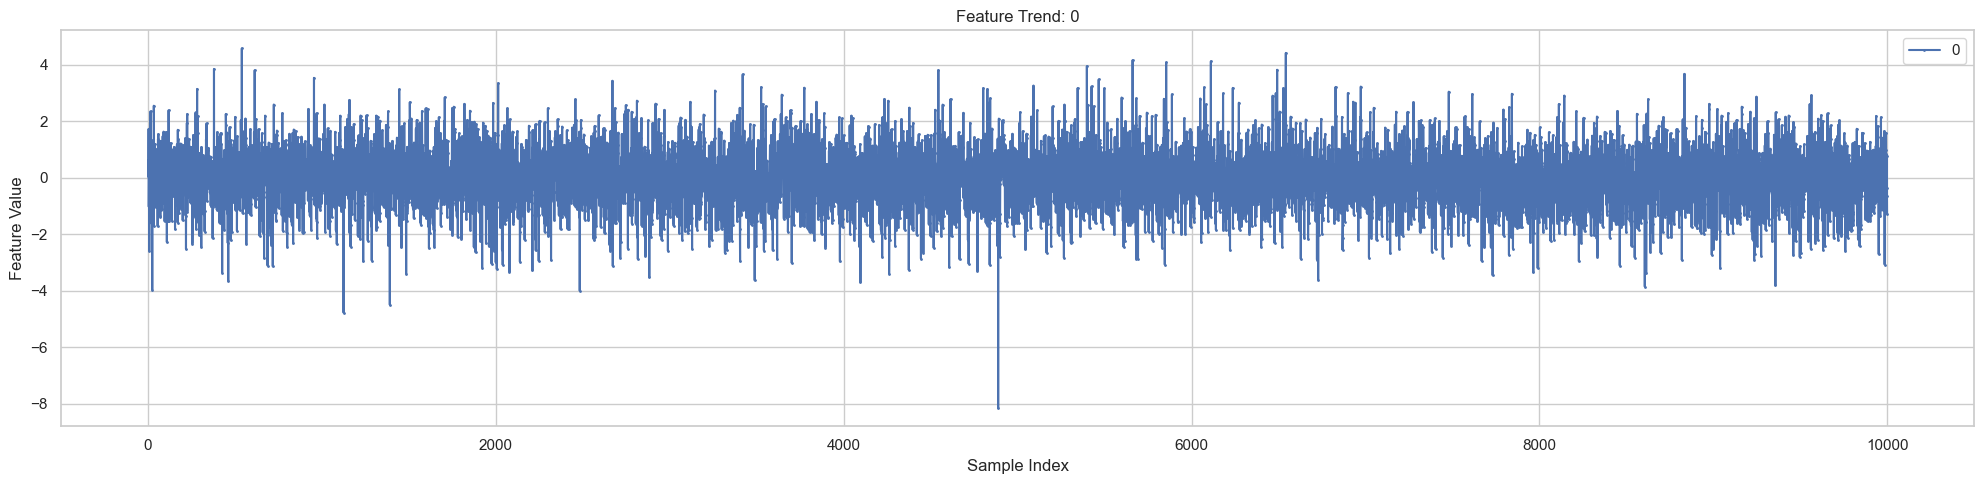

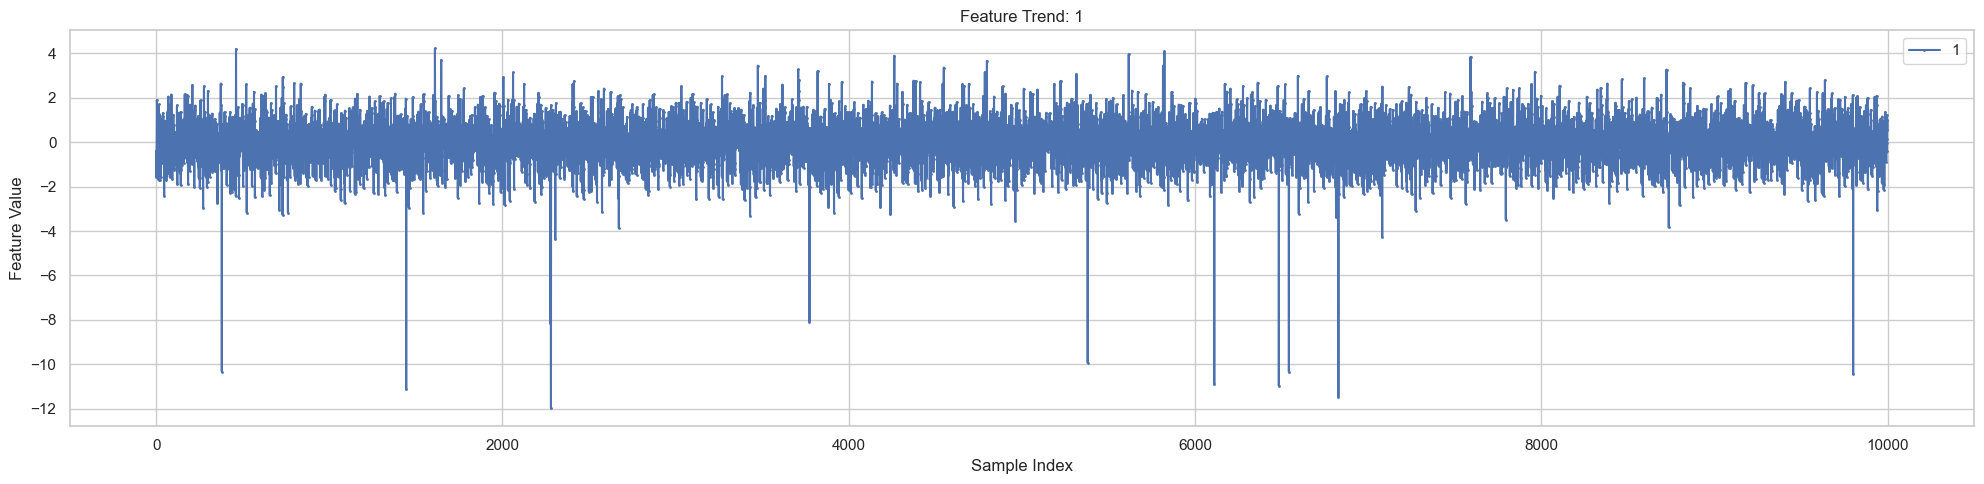

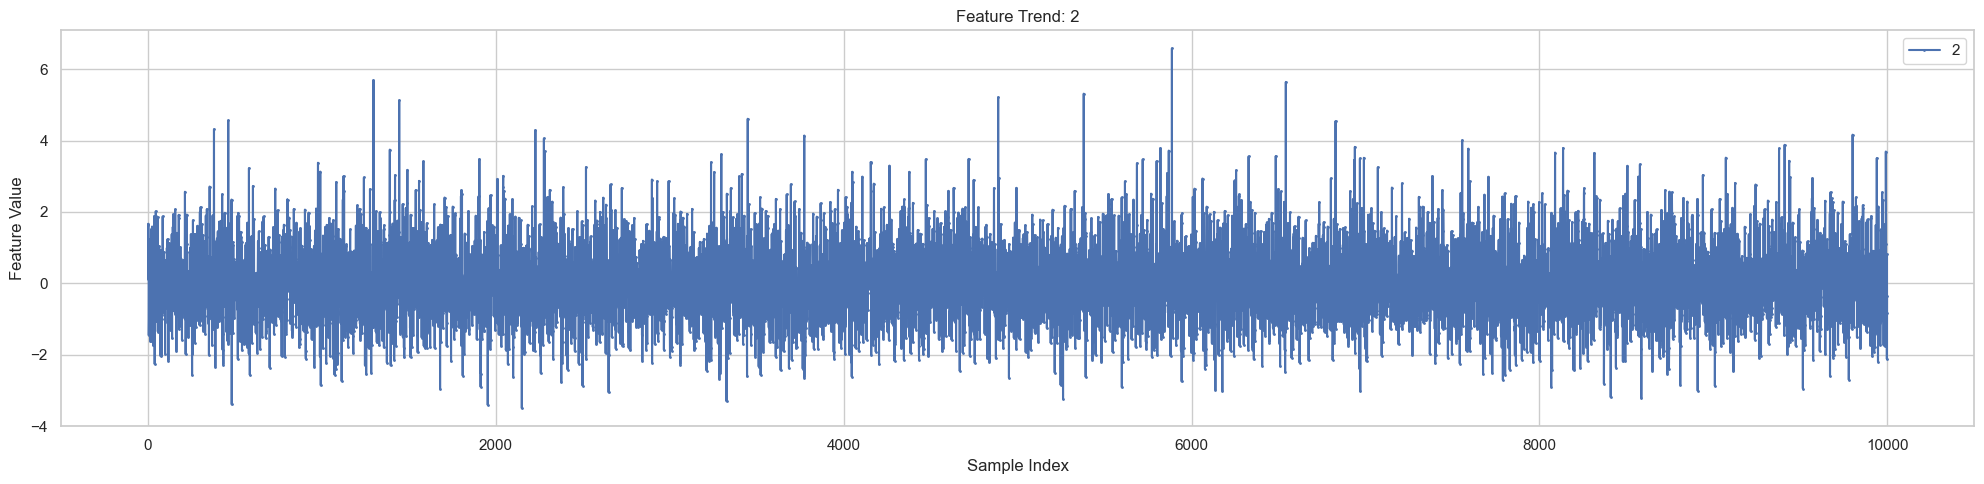

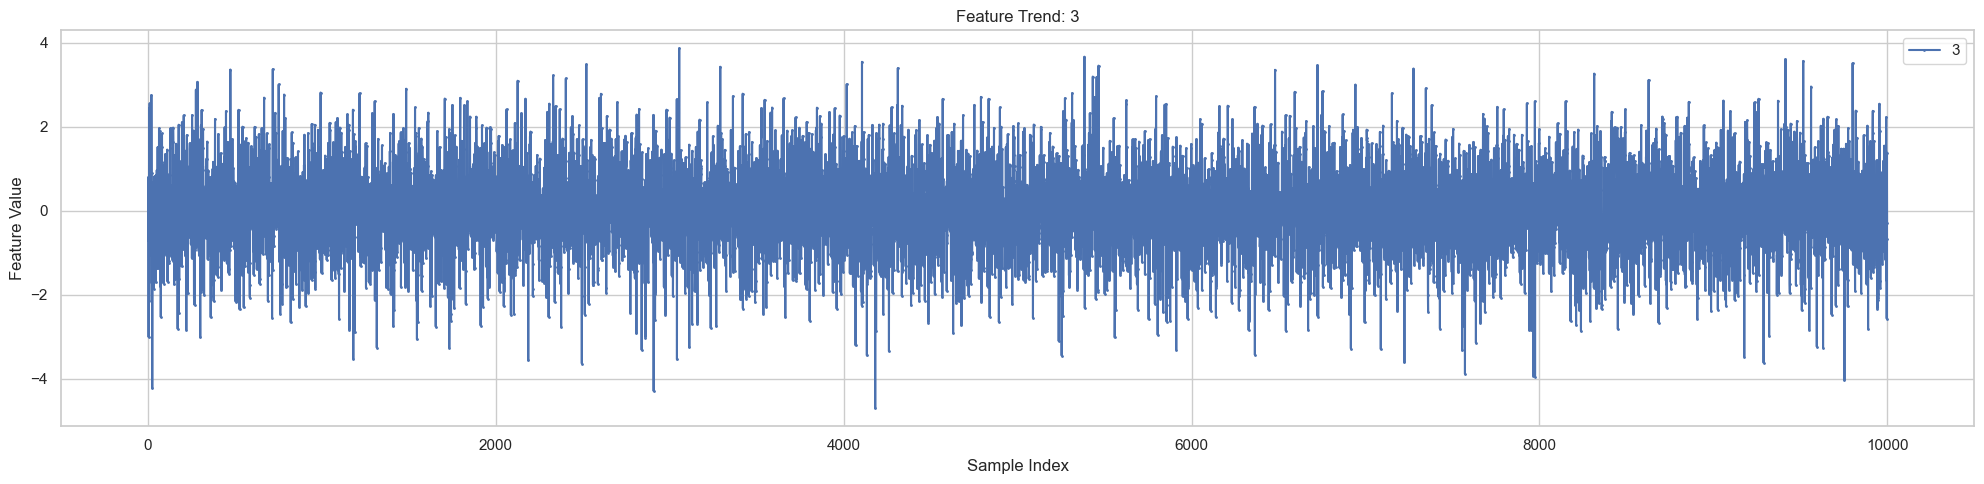

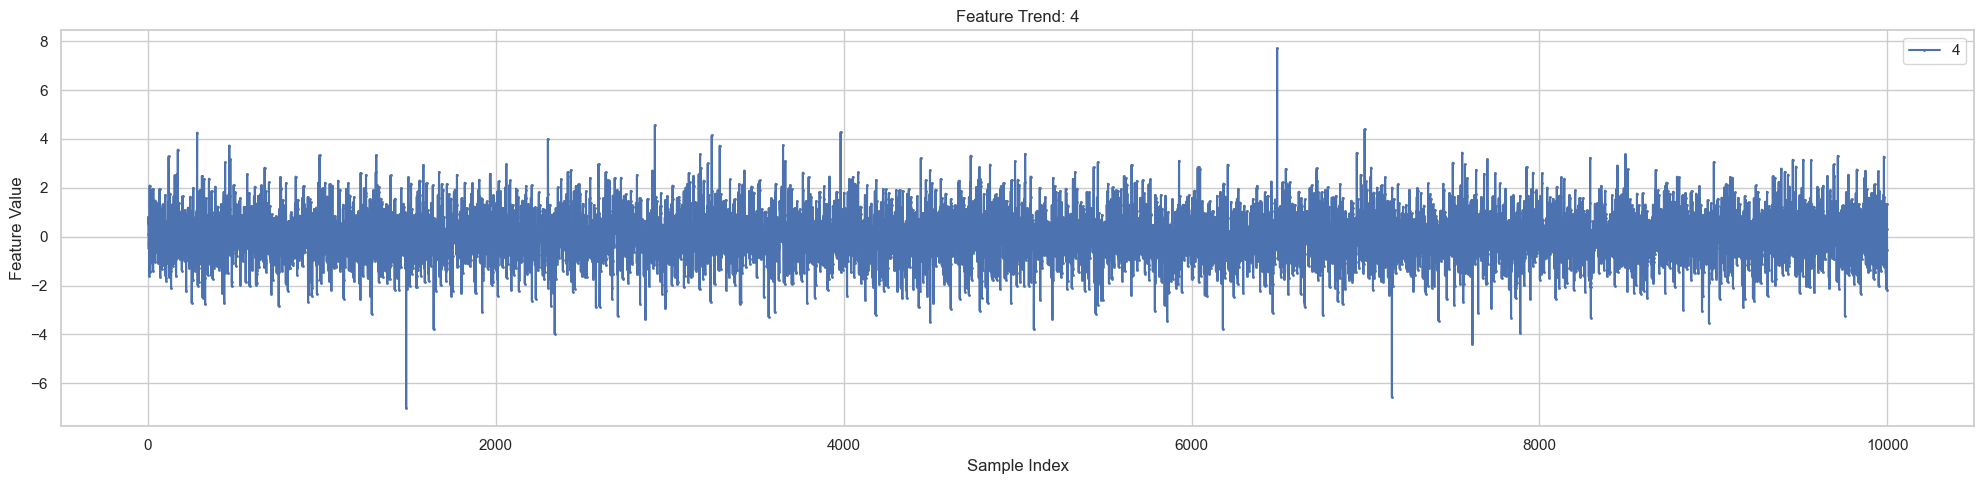

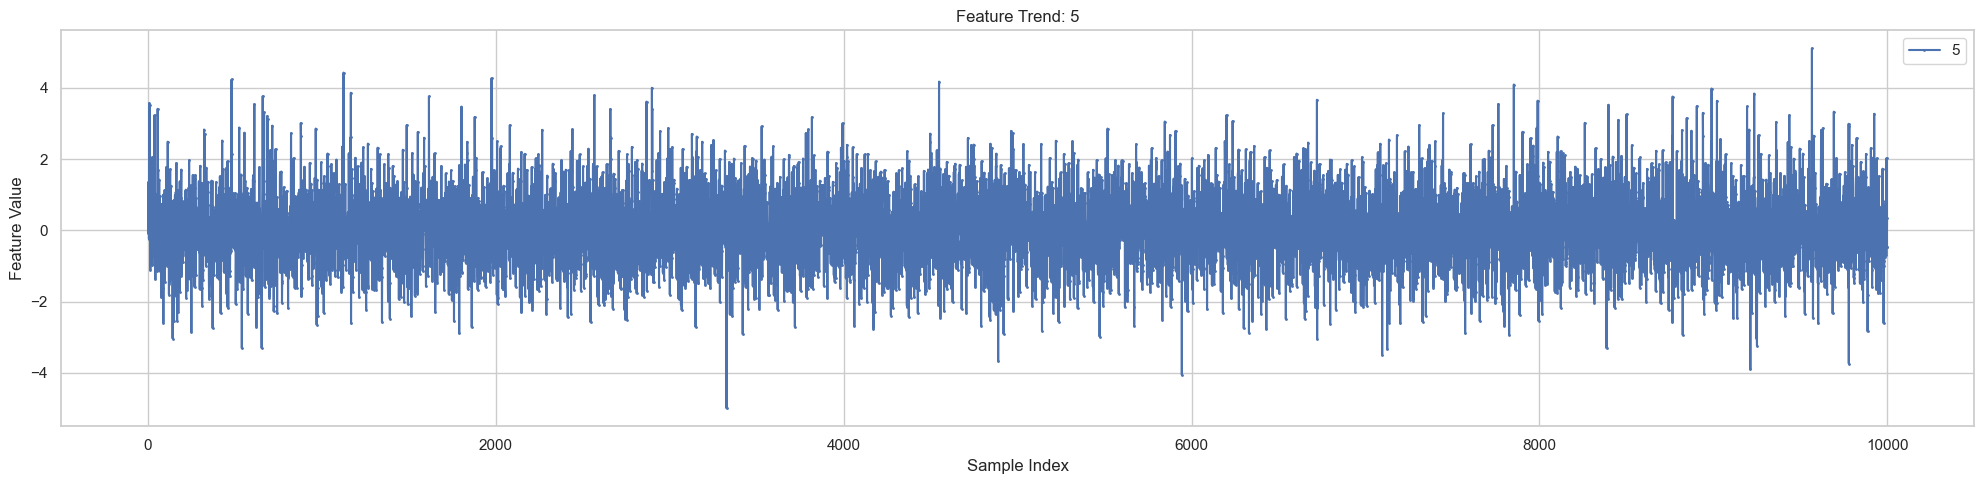

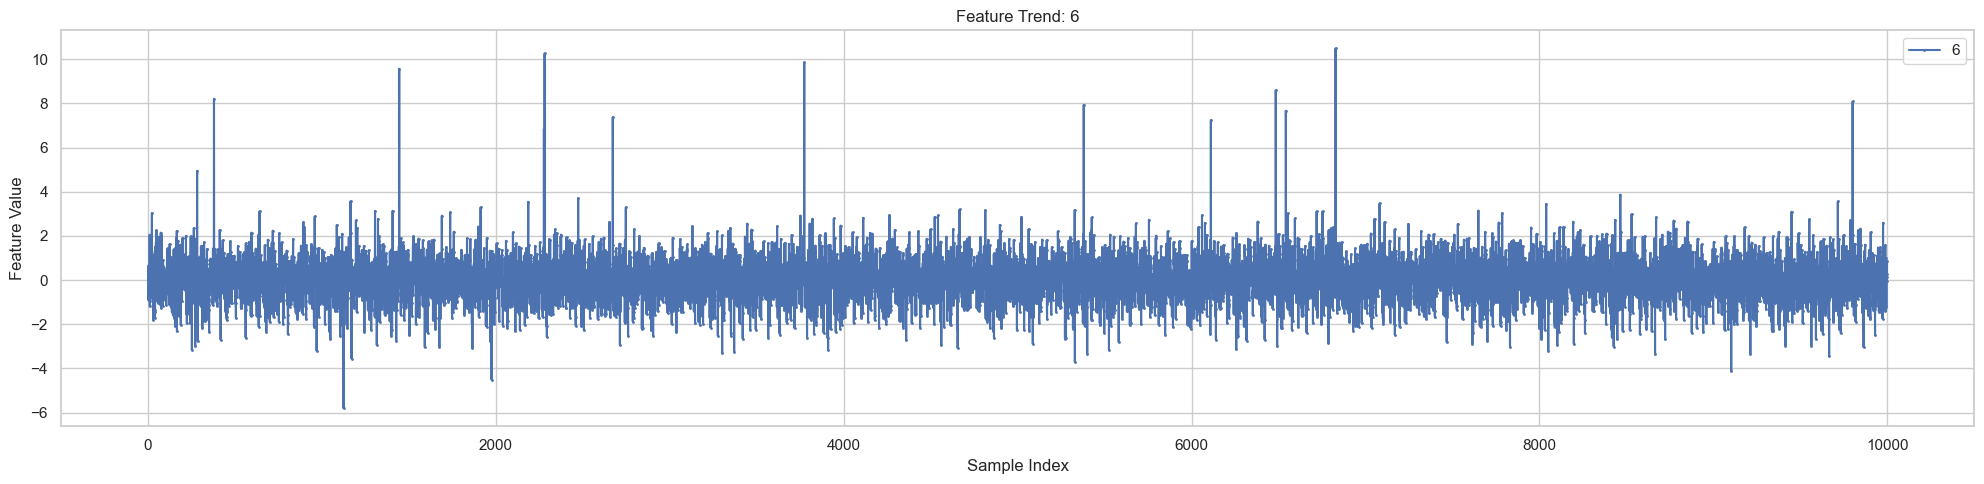

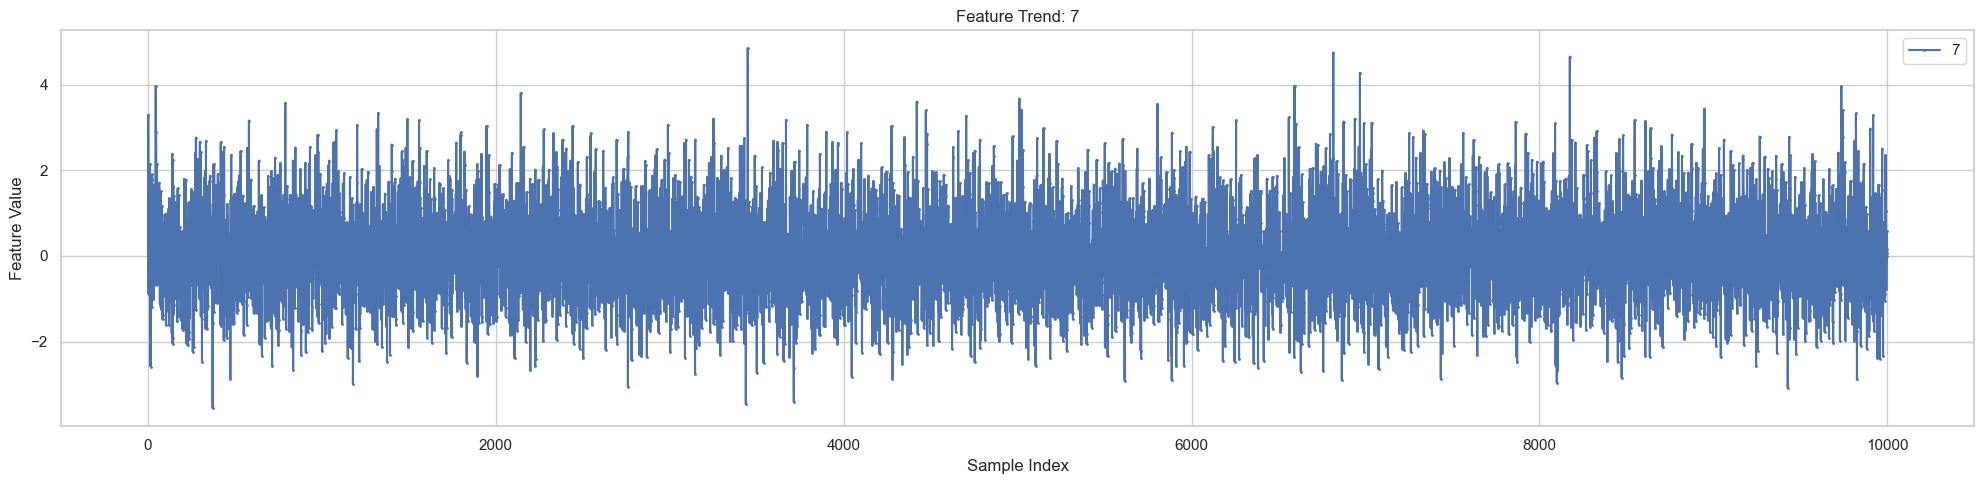

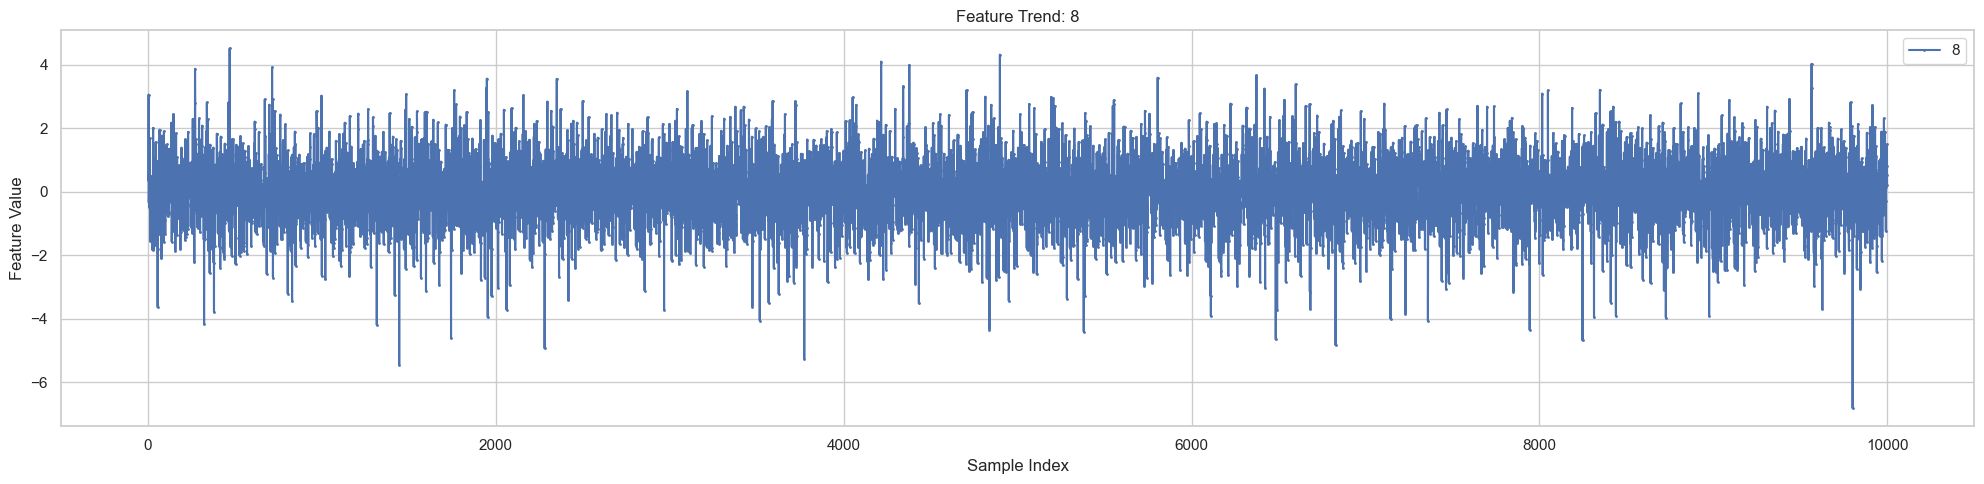

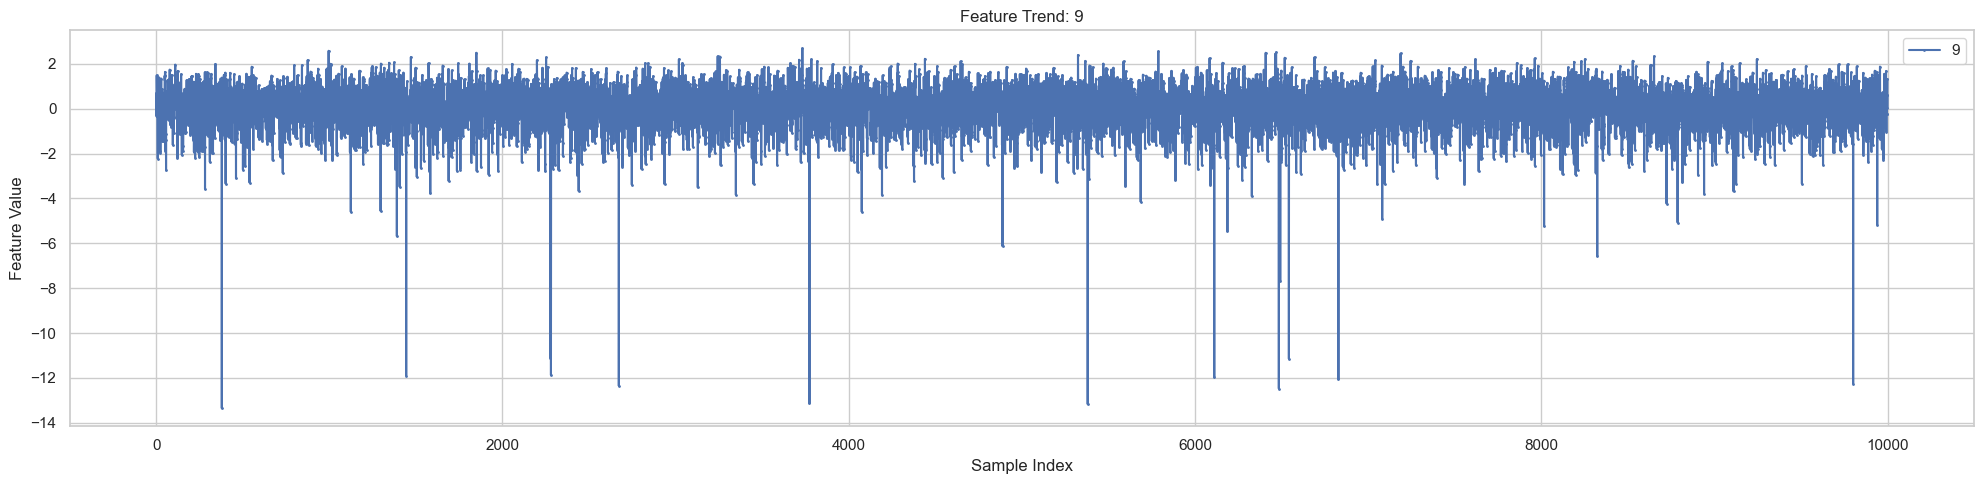

In [309]:
for column in x_train.columns[:10]:  
    plt.figure(figsize=(20, 5))
    plt.plot(x_train.index, x_train[column], marker='o', markersize=1, linestyle='-', label=column)
    plt.title(f'Feature Trend: {column}')
    plt.xlabel('Sample Index')
    plt.ylabel('Feature Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Conclusion: The main distribution is concentrated, but there are sparse anomalous spikes that should be treated as outliers

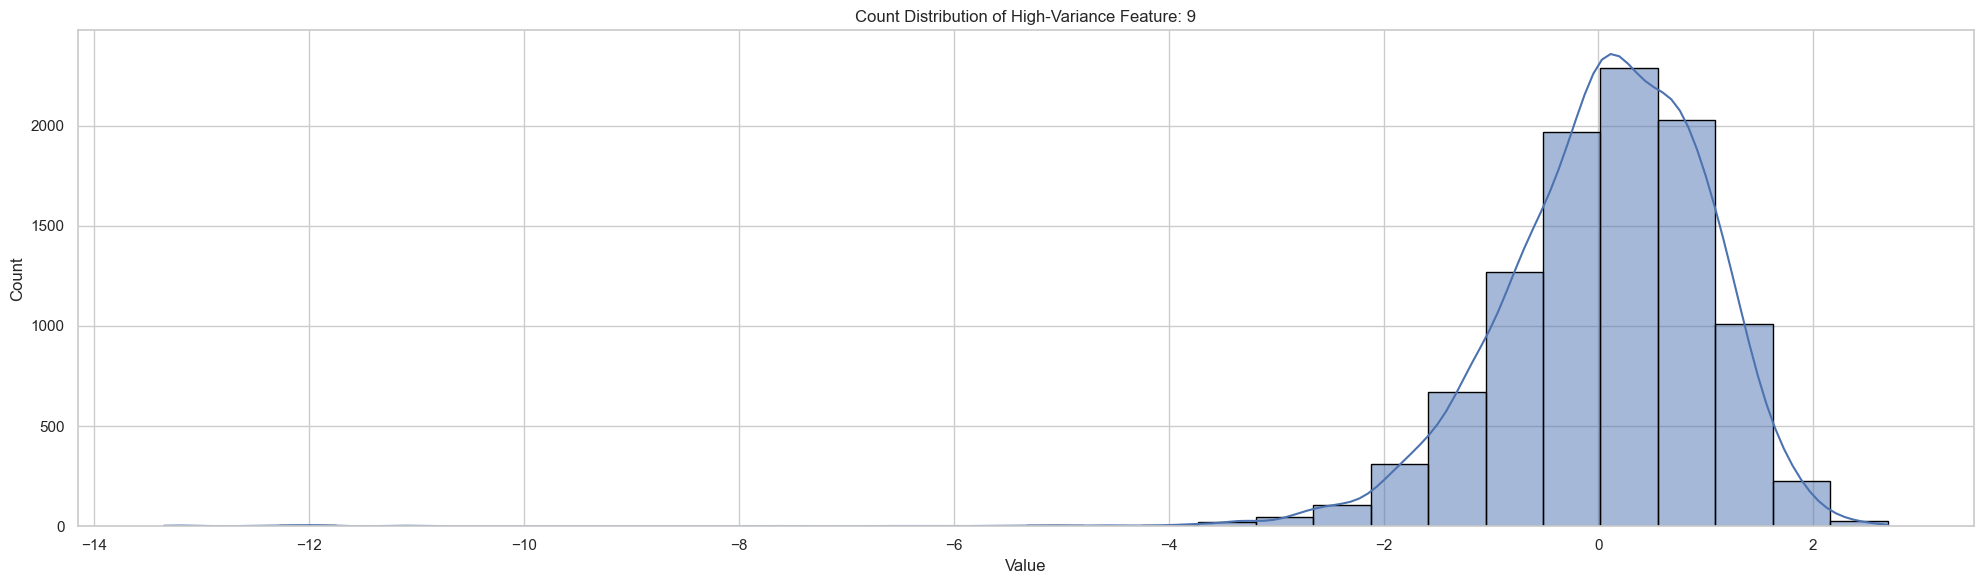

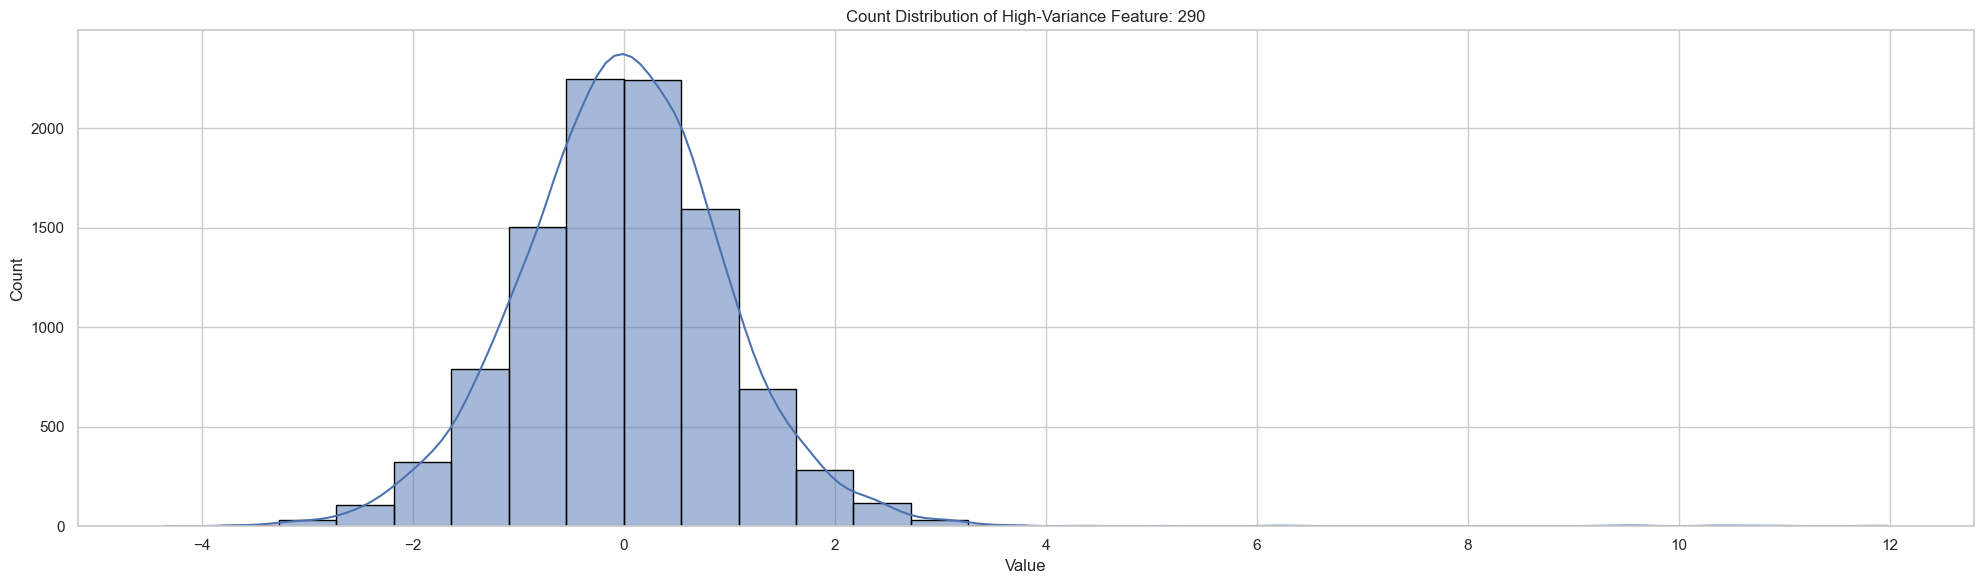

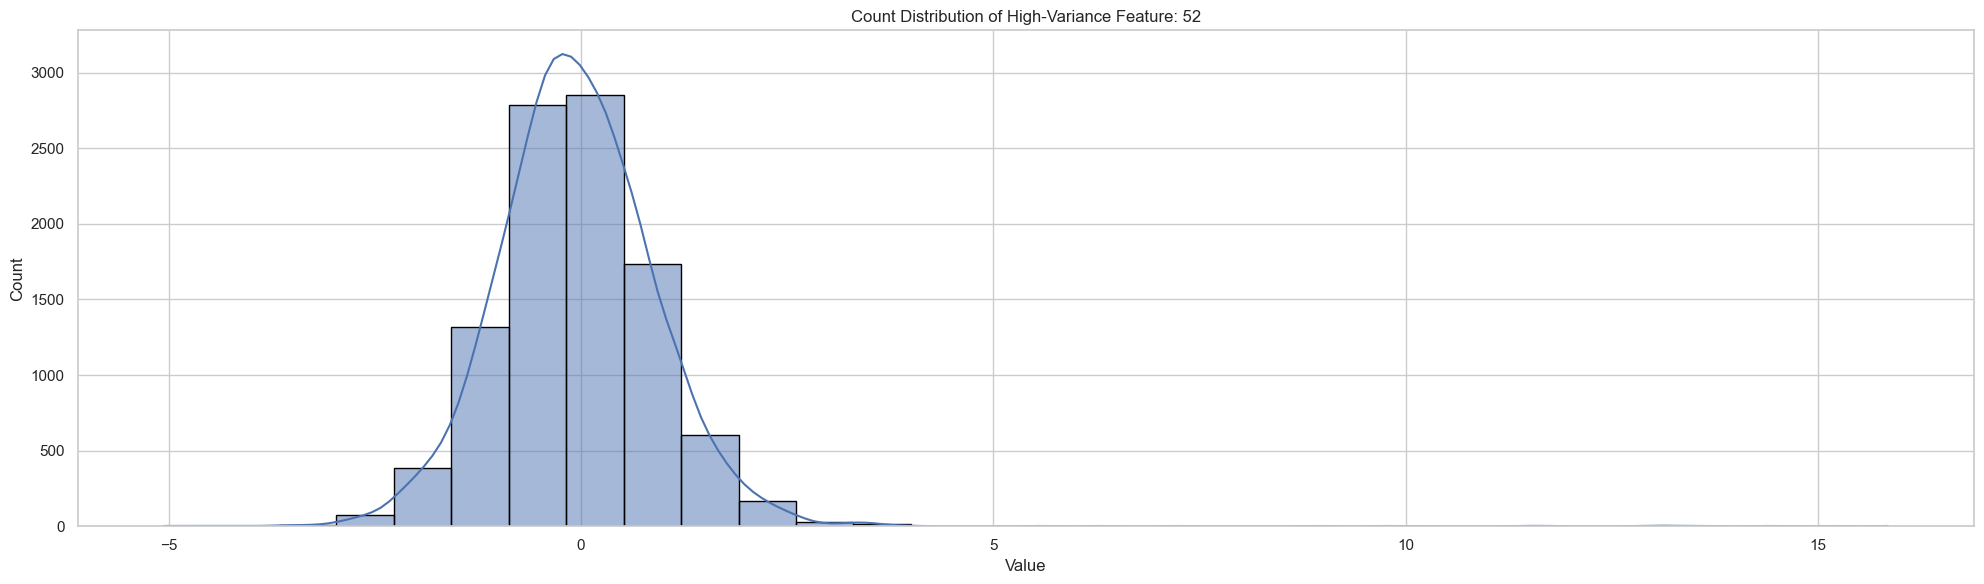

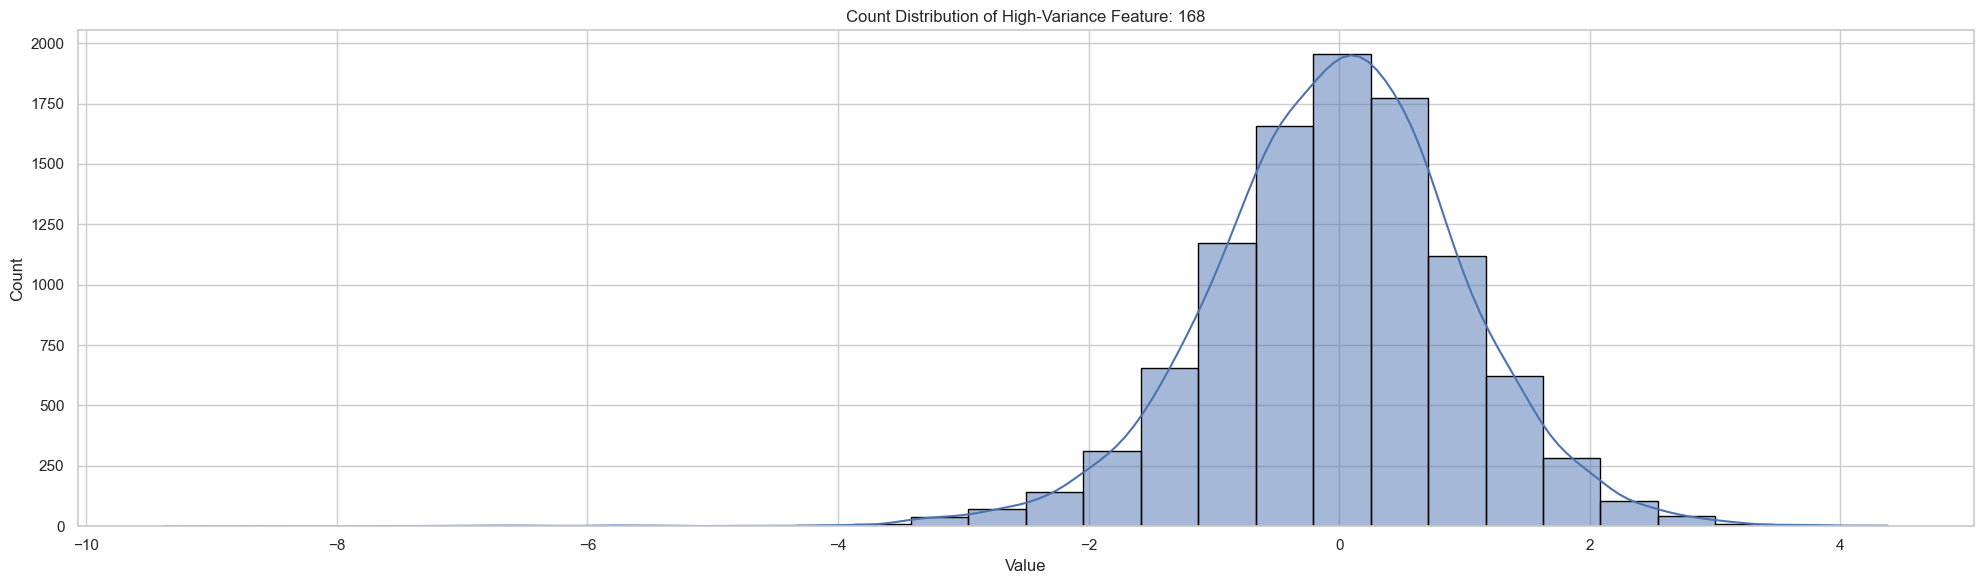

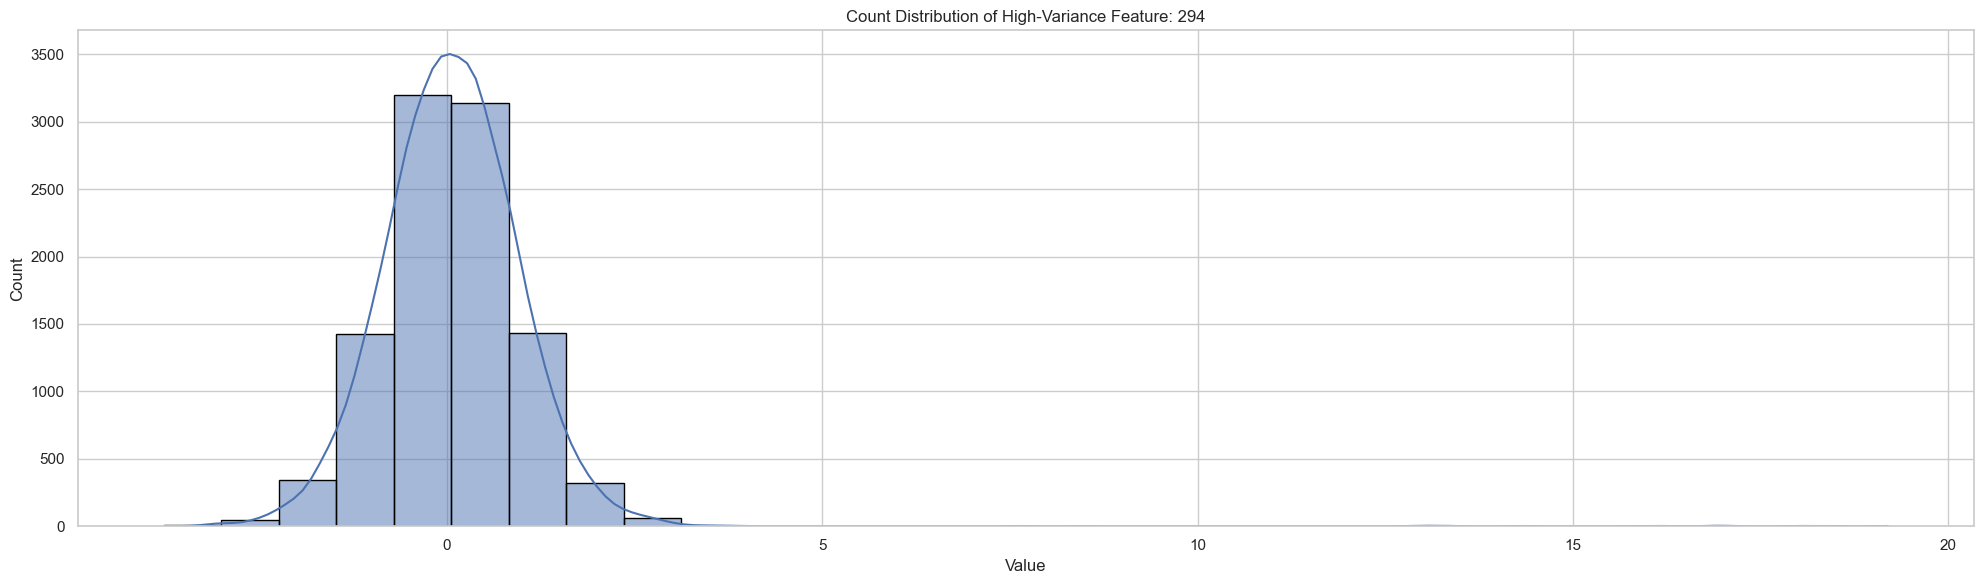

In [310]:
sns.set(style="whitegrid")
# Select the top 20 features with the highest standard deviation
top_std_columns = x_train.std().sort_values(ascending=False).head(5).index


for column in top_std_columns:
    plt.figure(figsize=(20, 6))
    sns.histplot(x_train[column], bins=30, kde=True, edgecolor='black')
    plt.title(f'Count Distribution of High-Variance Feature: {column}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### This contrast highlights the need for outlier handling: while some features are inherently clean, others introduce irregular spikes that may bias the learning process. To address this, we applied IQR-based outlier replacement, replacing values outside the [Q1 - 1.5×IQR, Q3 + 1.5×IQR] range with the median of each feature. This ensures that the distribution of features remains robust while preserving underlying patterns.


### Replace outliers using IQR method

In [311]:
def replace_outliers_iqr(df, threshold=1.5):
    df_clean = df.copy()
    for col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - threshold * IQR
        upper = Q3 + threshold * IQR
        median = df_clean[col].median()

        df_clean.loc[(df_clean[col] < lower) | (df_clean[col] > upper), col] = median

    return df_clean

x_train_cleaned = replace_outliers_iqr(x_train)

### After completing the outlier processing, the first 10 features are visually inspected.


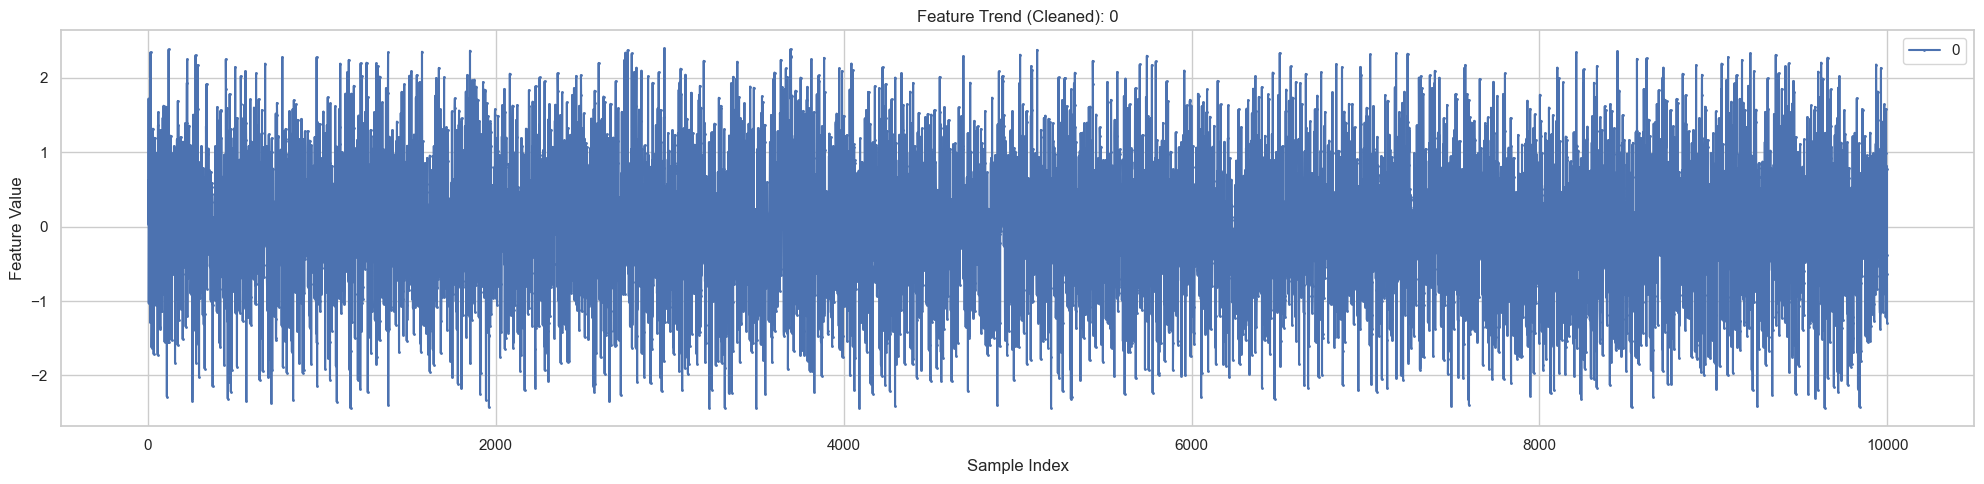

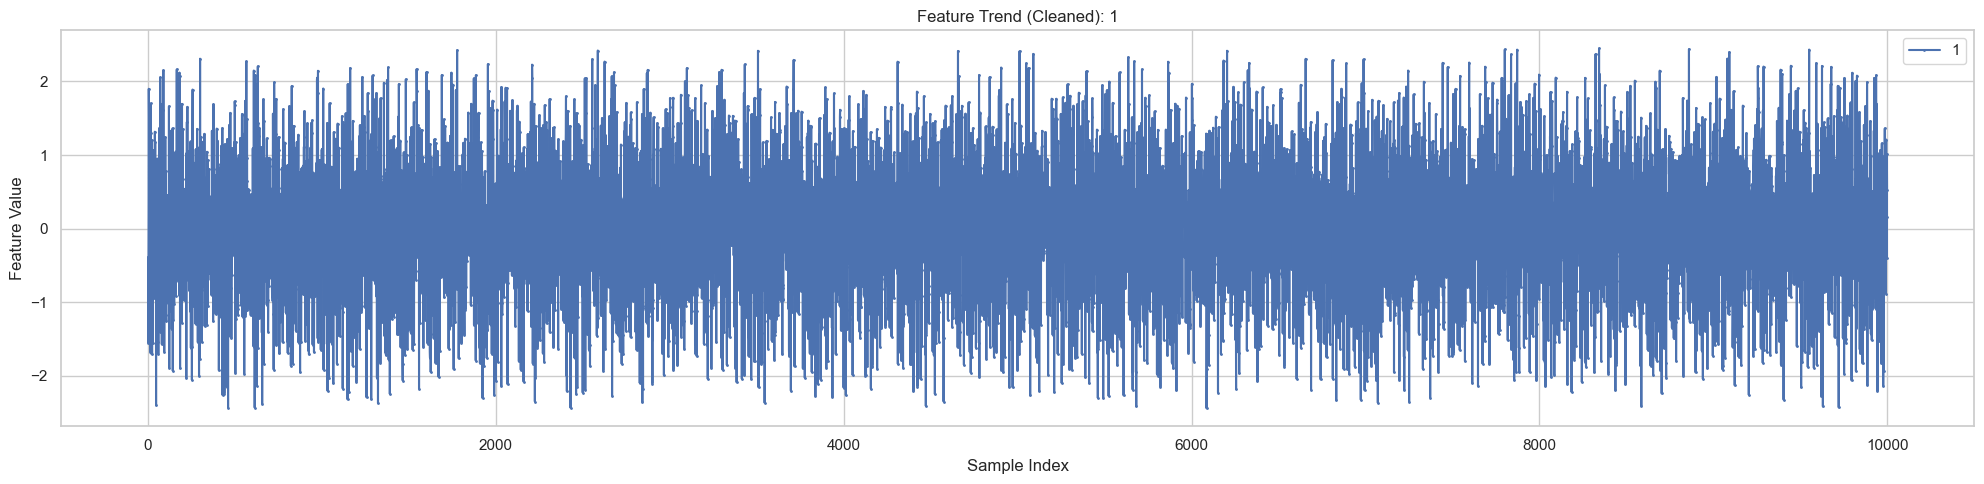

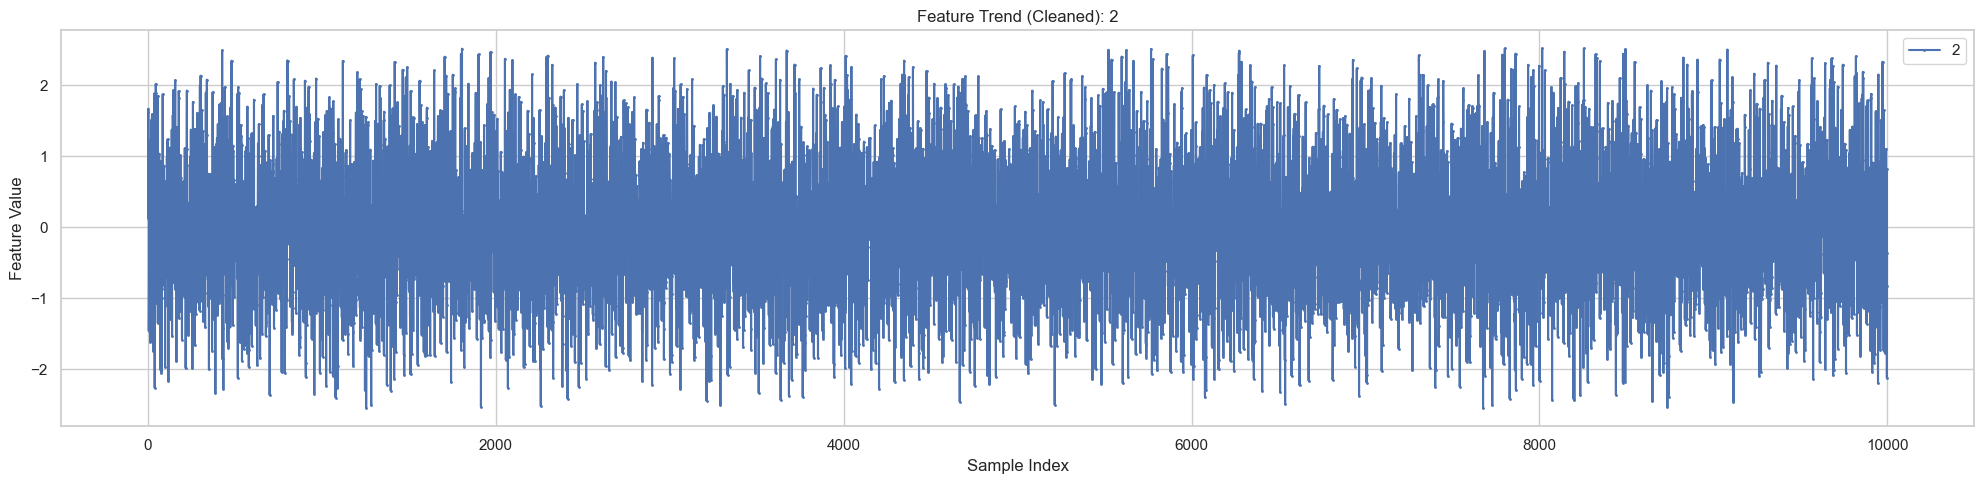

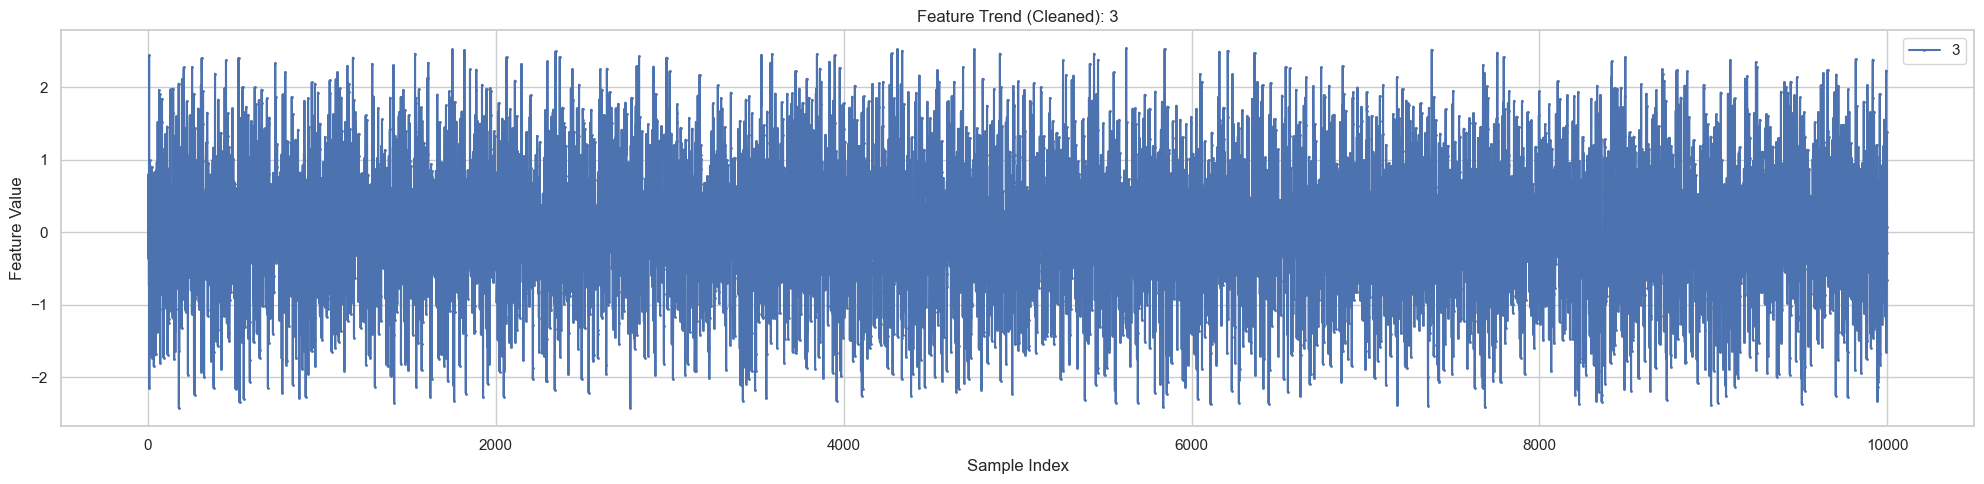

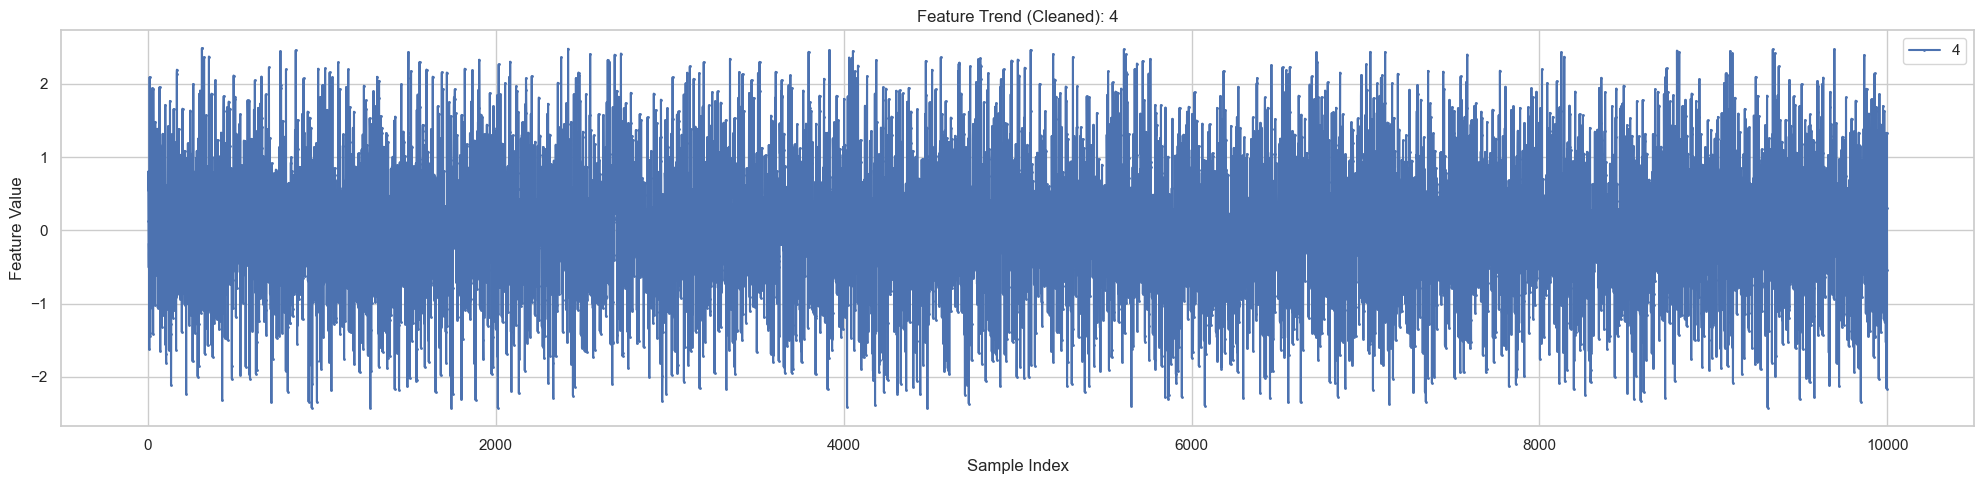

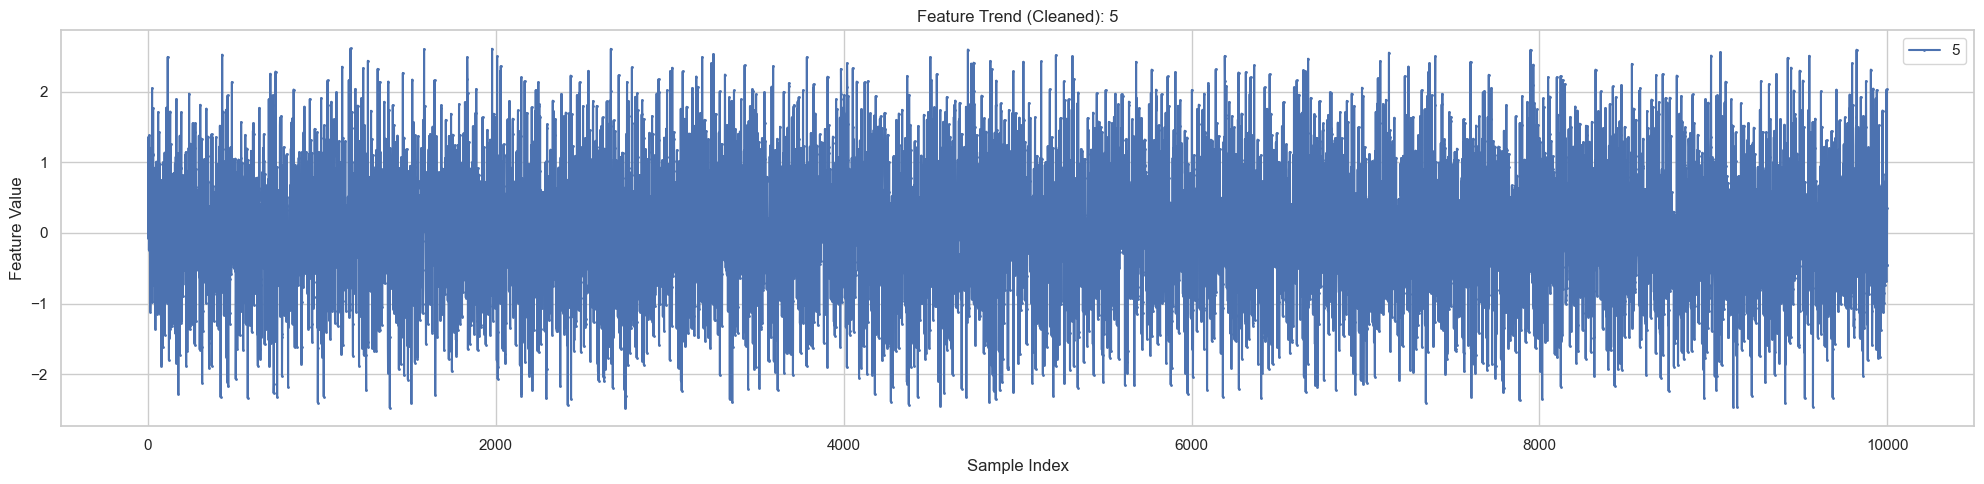

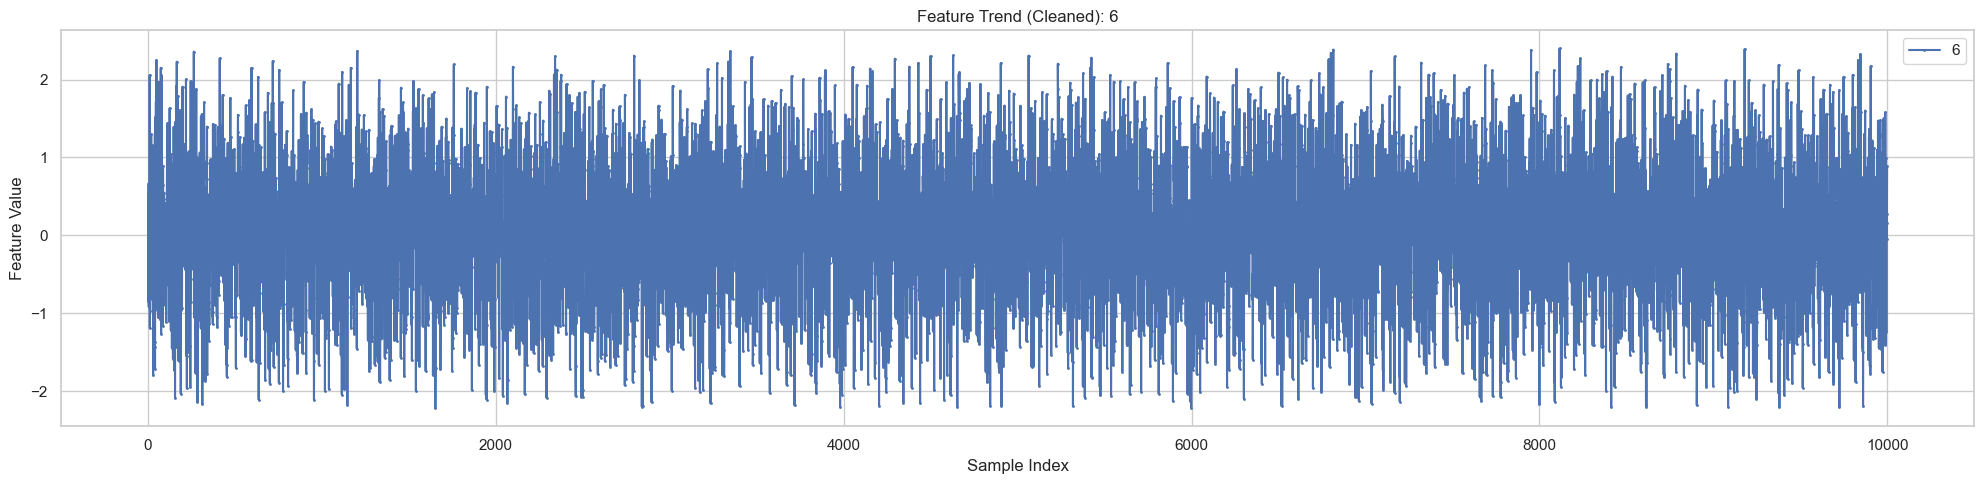

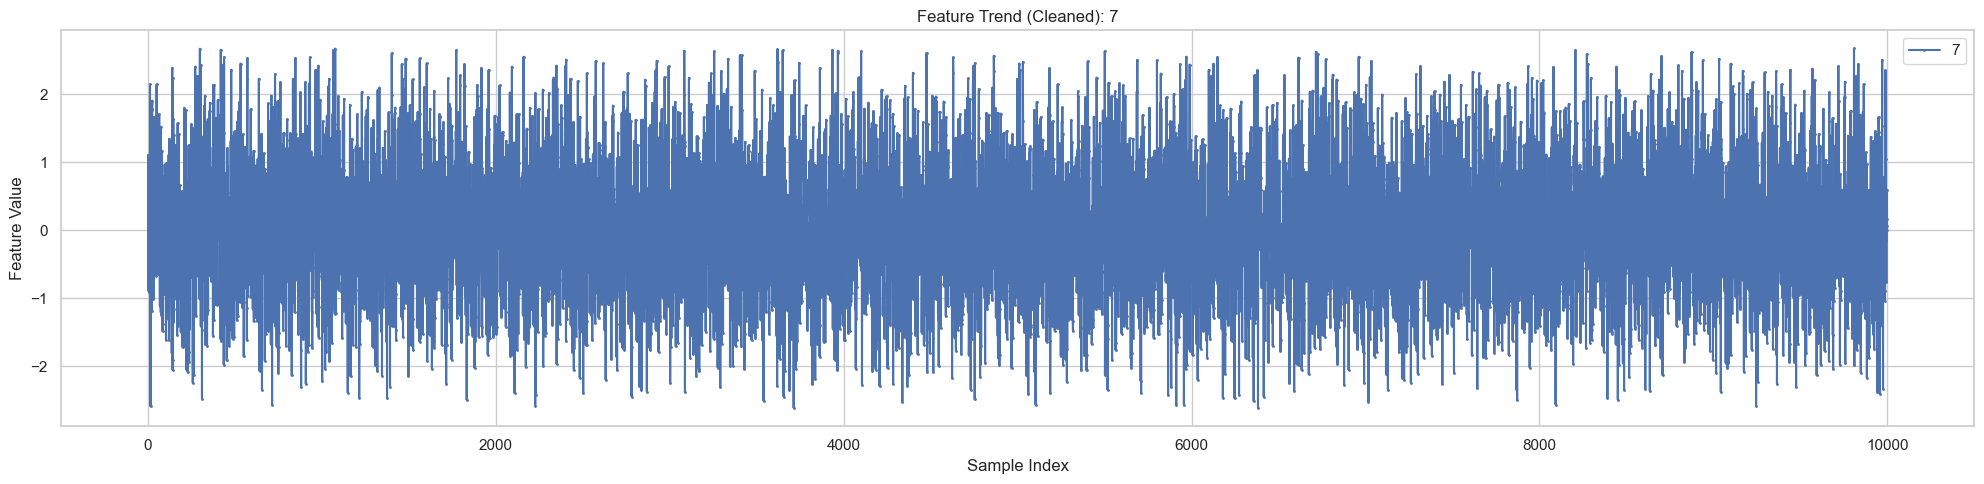

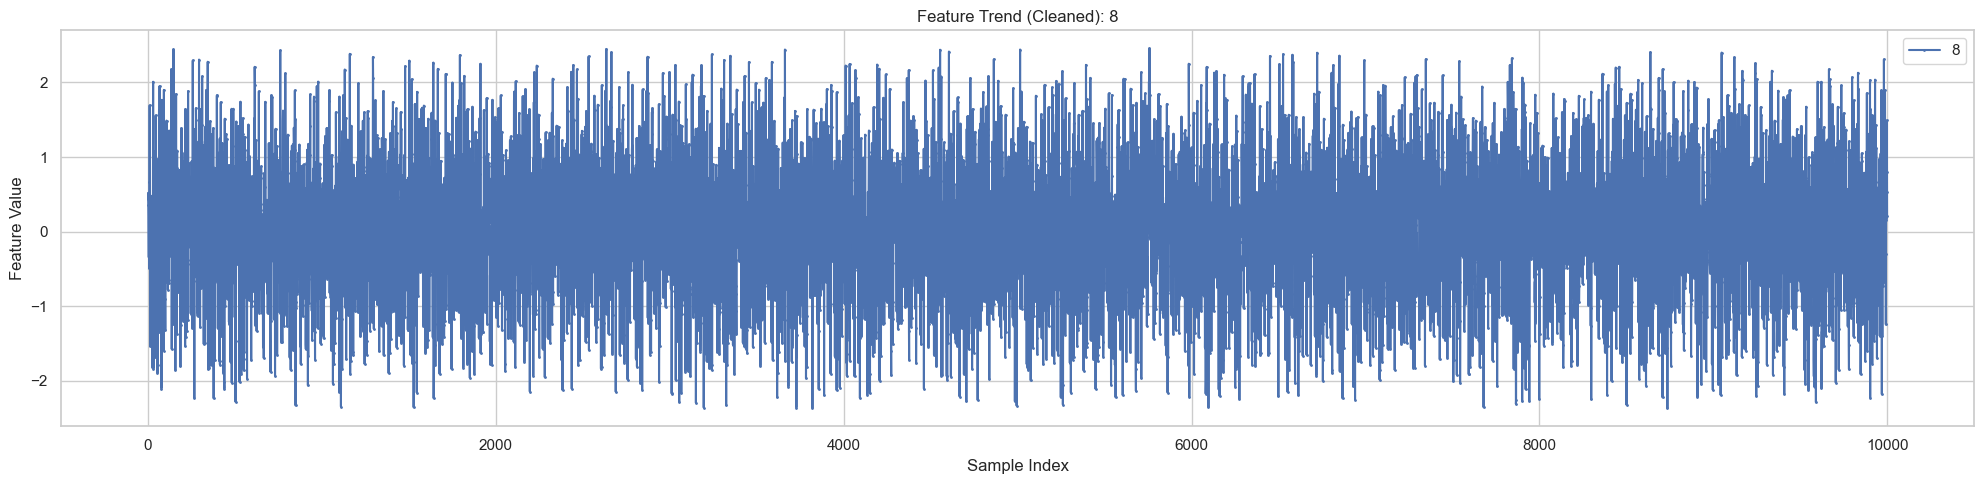

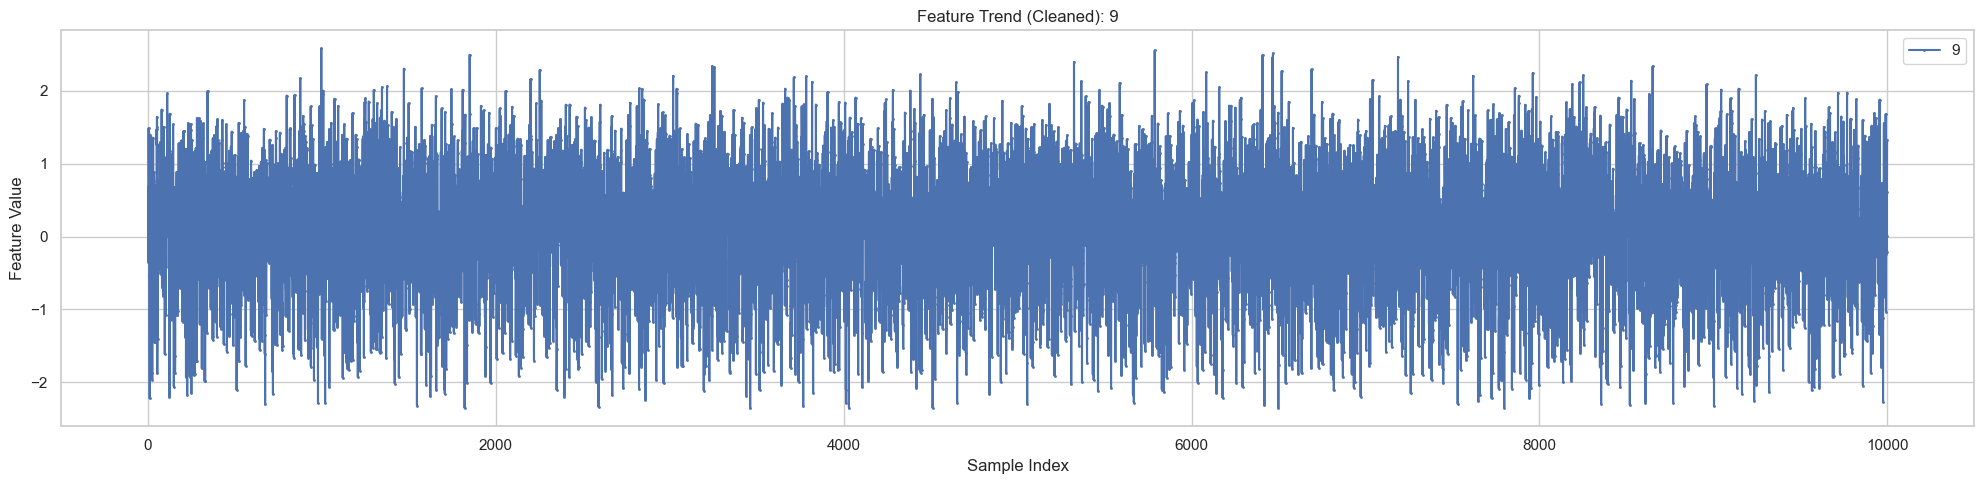

In [312]:
for column in x_train_cleaned.columns[:10]:
    plt.figure(figsize=(20, 5))
    plt.plot(x_train_cleaned.index, x_train_cleaned[column], marker='o', markersize=1, linestyle='-', label=column)
    plt.title(f'Feature Trend (Cleaned): {column}')
    plt.xlabel('Sample Index')
    plt.ylabel('Feature Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


### After applying IQR-based outlier replacement, the temporal trends of each feature became noticeably more stable and centered. As shown in the cleaned plots for Feature 6 and Feature 7, all values are constrained within approximately [-2.5, 2.5], eliminating the extreme spikes observed in the raw data. 

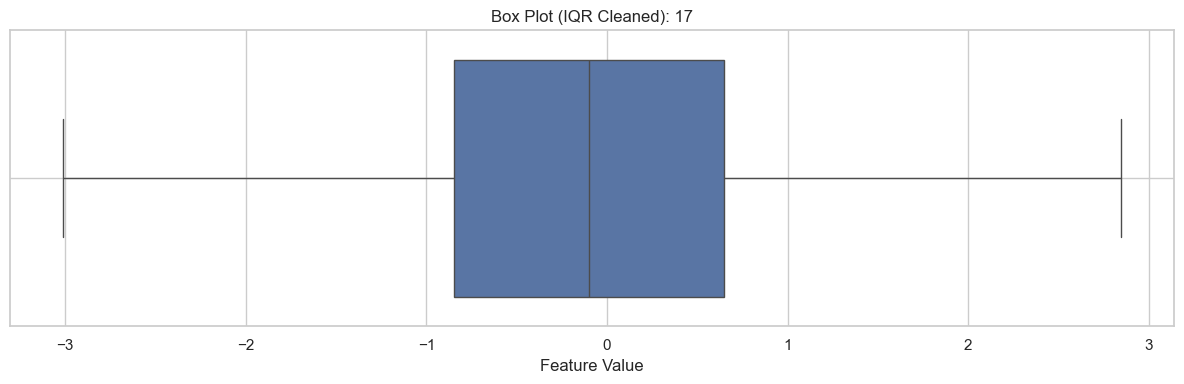

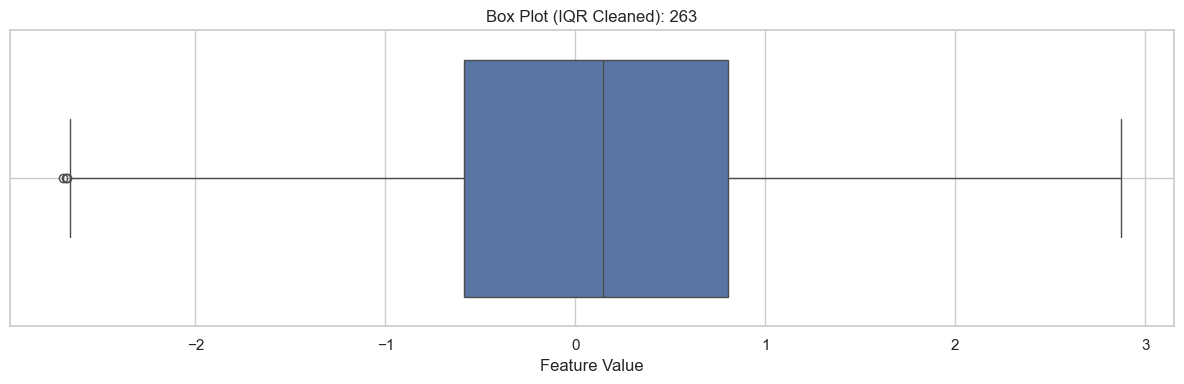

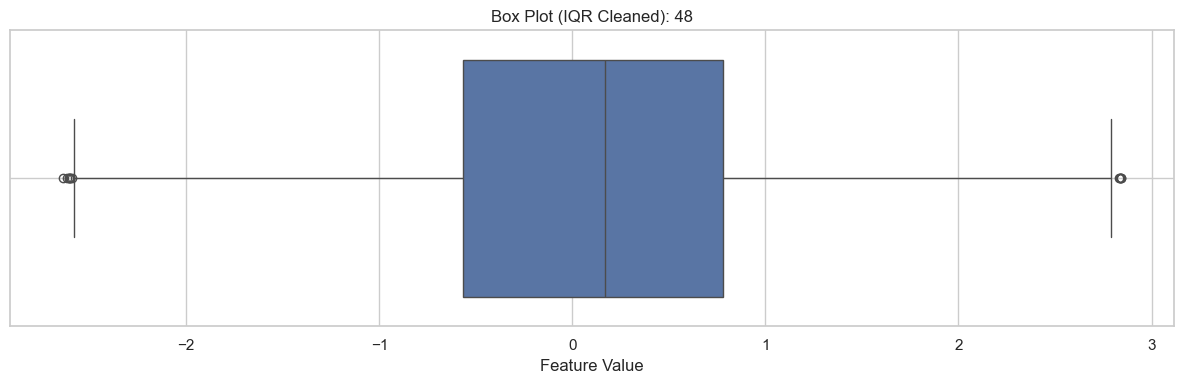

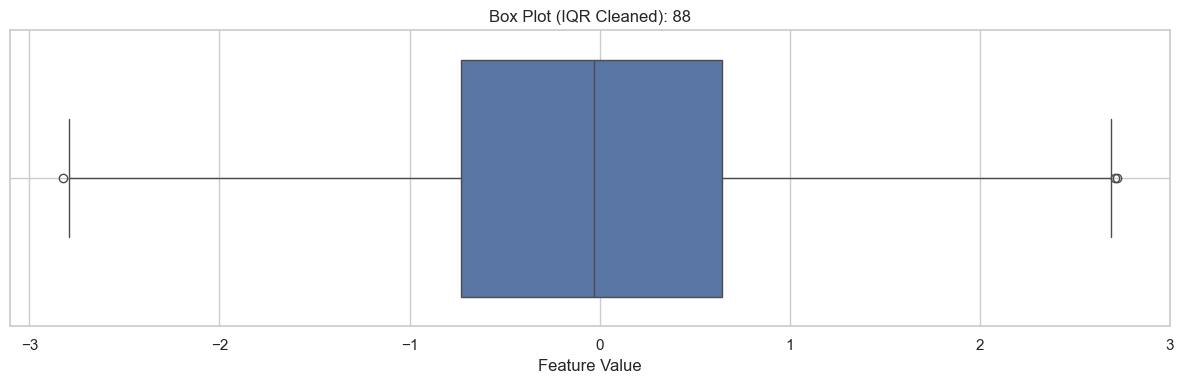

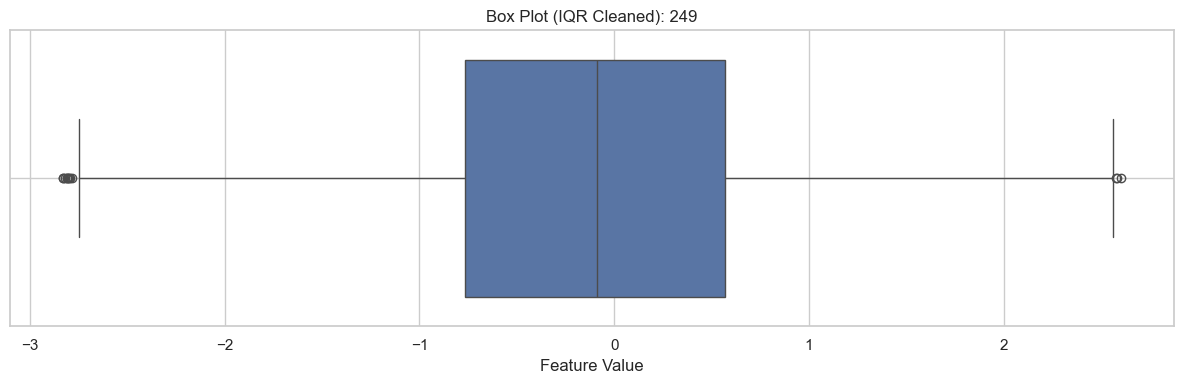

In [313]:
sns.set(style="whitegrid")
top_columns = x_train_cleaned.std().sort_values(ascending=False).head(5).index

for column in top_columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=x_train_cleaned[column])
    plt.title(f'Box Plot (IQR Cleaned): {column}')
    plt.xlabel('Feature Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### After applying IQR-based outlier replacement, we further validated the cleaning results using boxplots. As seen in the plots for Feature 263 and Feature 48, the majority of data is now well-contained within the interquartile range, with only a few mild outliers remaining near the boundaries. The overall distributions are symmetrical and centered, with median values close to zero. This confirms that our outlier mitigation strategy effectively reduced the influence of extreme values while preserving the essential characteristics of each feature.


## 2. Feature selection

### In order to effectively identify the features with the most predictive power, we employ three complementary feature importance assessment methods in terms of three dimensions: non-linear correlation, model structure contribution, and category differentiation:

### Mutual Information (MI)
#### The non-linear correlation between each feature and the target category is assessed. By calculating the MI score, we identify those features that have strong information coupling with the category labels.

### Random Forest Feature Importance
#### Use the RandomForestClassifier to extract the average gain value of features used for splitting in the tree structure. This method emphasises the direct contribution of features in the classification process.

### Cross-Class Mean Difference
#### Analyses the mean difference of each feature across classes to measure its effectiveness in class differentiation. This method emphasises the variability in the distribution of features across categories.


### The final selection of intersection features that are important in all three methods was made.

### 为了有效识别最具预测能力的特征，我们采用了三种互补的特征重要性评估方法，分别从非线性相关性、模型结构贡献和类别区分度三个维度进行评估：

### Mutual Information (MI)
#### 评估每个特征与目标类别之间的非线性相关性。通过计算 MI 分数，我们识别出那些与类别标签具有较强信息耦合的特征。

### Random Forest Feature Importance
#### 使用 RandomForestClassifier 提取特征在树结构中用于分裂的平均增益值。该方法强调特征在分类过程中的直接贡献。

### Cross-Class Mean Difference (类别均值差异)
#### 分析每个特征在不同类别中的均值差异，用于度量其在类别区分方面的效果。该方法强调特征在类别上的分布差异性。

#### Method1 ：Mutual Information

<Axes: title={'center': 'Top 20 Features by Mutual Information'}>

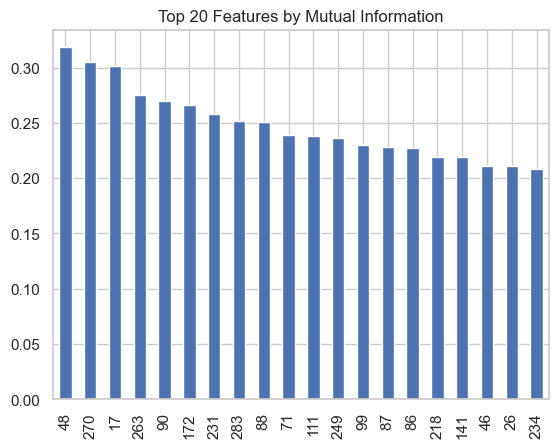

In [314]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x_train, y_train.squeeze())
mi_series = pd.Series(mi_scores, index=x_train.columns).sort_values(ascending=False)
top_mi_features = mi_series.head(20)
top_mi_features.plot(kind='bar', title='Top 20 Features by Mutual Information')

#### Method2：RandomForest

<Axes: title={'center': 'Top 20 Features by Random Forest Importance'}>

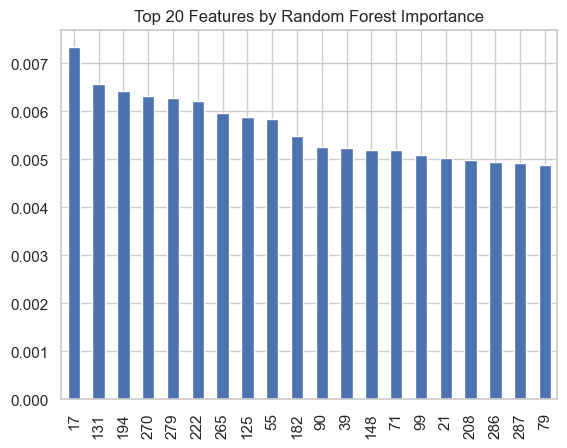

In [315]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(x_train, y_train.values.ravel())
rf_importance = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
rf_importance.head(20).plot(kind='bar', title='Top 20 Features by Random Forest Importance')


#### Method3 ：Cross-Class Mean Diff

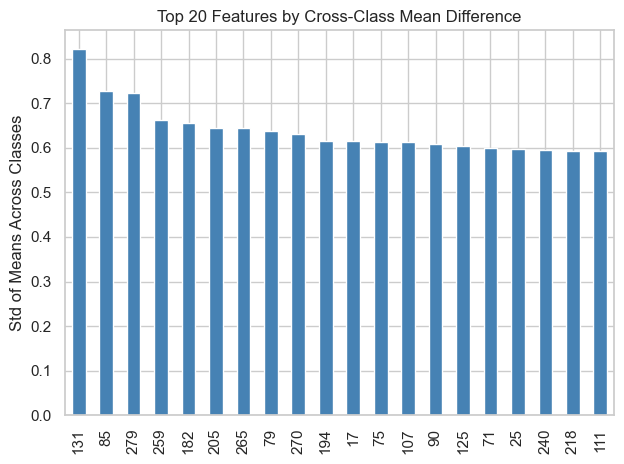

In [341]:

class_means = x_train.groupby(y_train).mean()


mean_diff = class_means.std(axis=0)


mean_diff_sorted = mean_diff.sort_values(ascending=False)

mean_diff_sorted.head(20).plot(kind='bar', color='steelblue')
plt.title("Top 20 Features by Cross-Class Mean Difference")
plt.ylabel("Std of Means Across Classes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Cumulative Feature Importance Curve
#### Find the minimum number of features that cumulatively contribute 90% of the total number of features

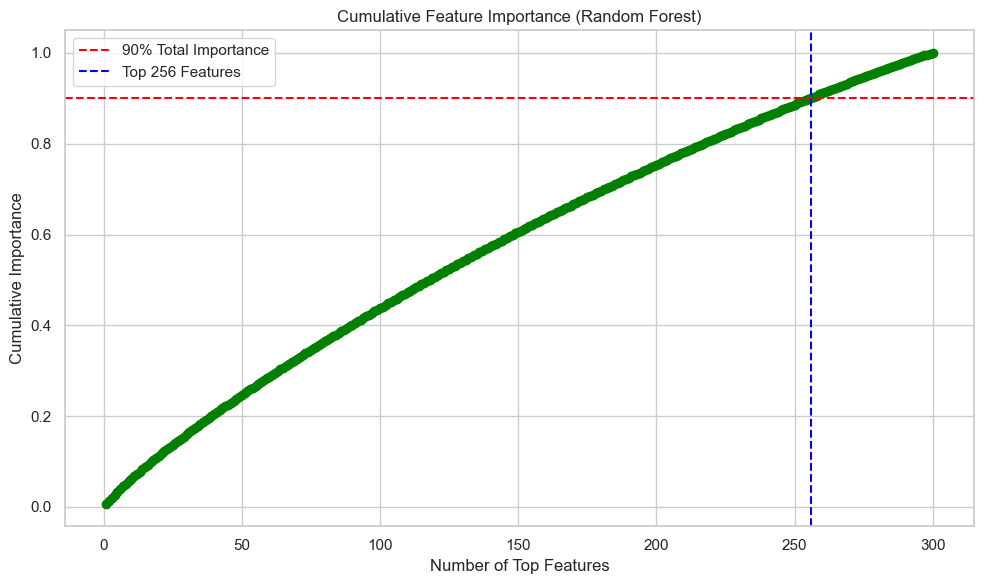

In [317]:
rf_sorted = rf_importance.sort_values(ascending=False)
cumulative_importance = np.cumsum(rf_sorted)
k_90 = np.argmax(cumulative_importance >= 0.9) + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', color='green')
plt.axhline(y=0.9, color='red', linestyle='--', label='90% Total Importance')
plt.axvline(x=k_90, color='blue', linestyle='--', label=f'Top {k_90} Features')
plt.title("Cumulative Feature Importance (Random Forest)")
plt.xlabel("Number of Top Features")
plt.ylabel("Cumulative Importance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("cumulative_rf_importance_curve.png", dpi=300)
plt.show()


### Minimum number of features required to cover ≥90% of total RF information: first 256 feature values. 
### Therefore our number of selected eigenvalues should preferably be around 256.


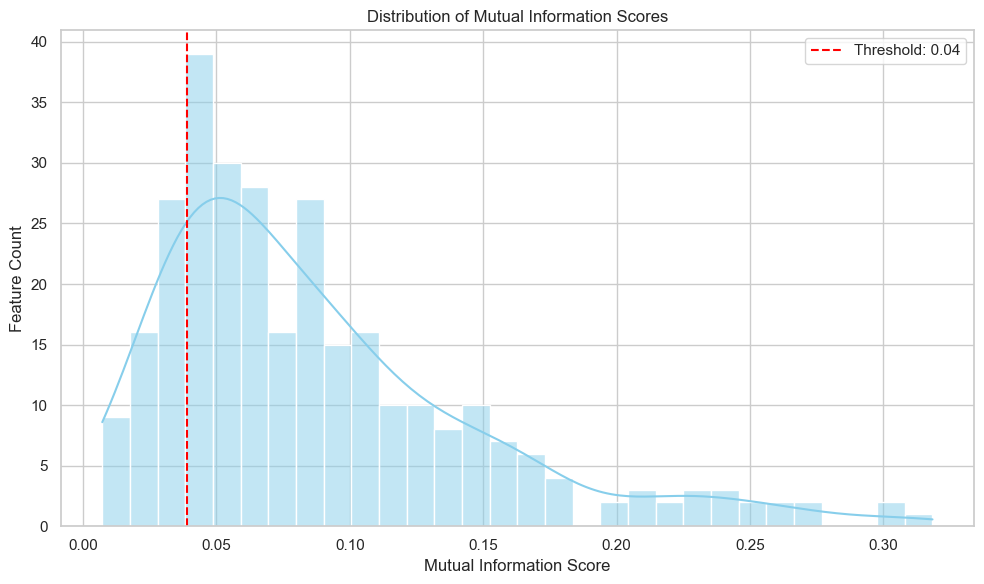

In [318]:
mi_series = mi_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.histplot(mi_series, bins=30, kde=True, color='skyblue')
plt.axvline(x=0.039, color='red', linestyle='--', label='Threshold: 0.04')
plt.title("Distribution of Mutual Information Scores")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature Count")
plt.legend()
plt.tight_layout()
plt.savefig("mutual_info_distribution_threshold.png", dpi=300)
plt.show()

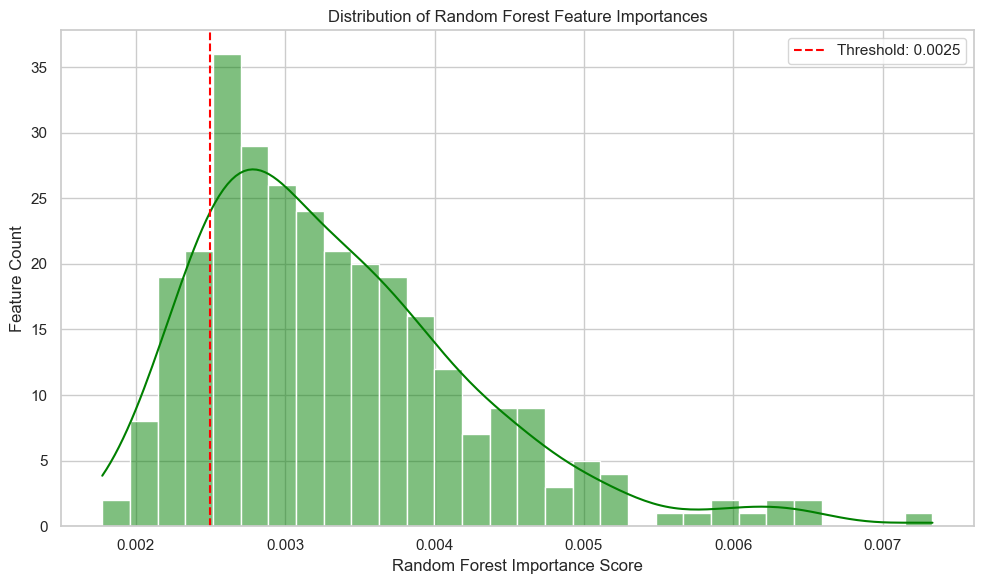

In [319]:
rf_series = rf_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.histplot(rf_series, bins=30, kde=True, color='green')
plt.axvline(x=0.0025, color='red', linestyle='--', label='Threshold: 0.0025')
plt.title("Distribution of Random Forest Feature Importances")
plt.xlabel("Random Forest Importance Score")
plt.ylabel("Feature Count")
plt.legend()
plt.tight_layout()
plt.savefig("random_forest_importance_distribution.png", dpi=300)
plt.show()

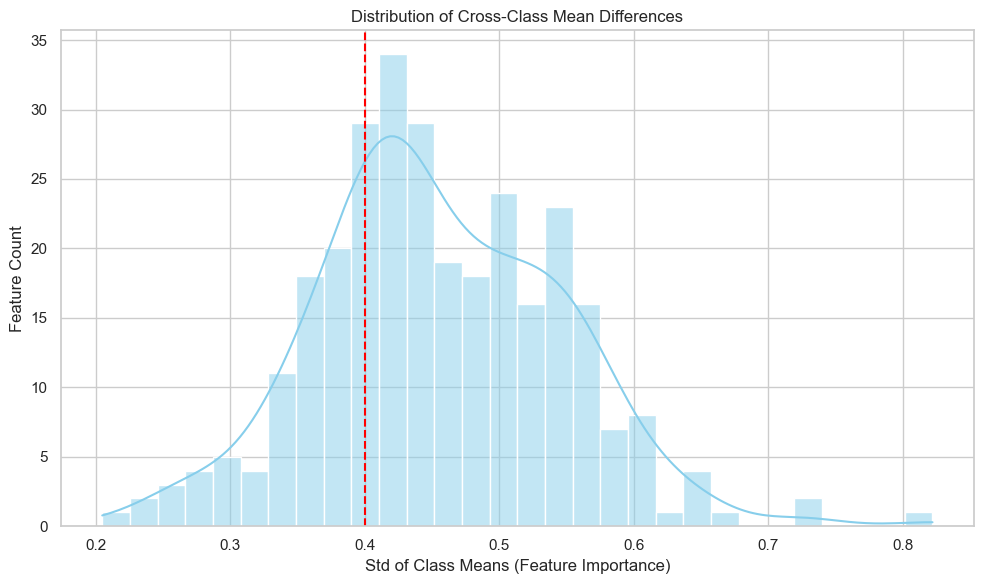

In [320]:

# 4. 可视化整体分布（直方图）
plt.figure(figsize=(10, 6))
sns.histplot(mean_diff_sorted, bins=30, kde=True, color='skyblue')
plt.axvline(x=0.4, color='red', linestyle='--', label='Threshold: 0.4')
plt.title("Distribution of Cross-Class Mean Differences")
plt.xlabel("Std of Class Means (Feature Importance)")
plt.ylabel("Feature Count")
plt.tight_layout()
plt.show()

### Feature Selection Result


#### Select features by intersecting results from MI, RF importance, and class-wise mean difference

In [344]:
selected_mi_features = mi_series[mi_series >= 0.0034].index
selected_rf_features = rf_series[rf_series >= 0.0024].index
selected_md_features = mean_diff_sorted[mean_diff_sorted >= 0.34].index

selected_features = list(set(selected_mi_features) & set(selected_rf_features)& set(selected_md_features))
# Extract the final feature set
x_selected = x_train[selected_features]
print(selected_features)
print(len(selected_features))


['112', '252', '26', '211', '290', '64', '208', '130', '55', '247', '81', '255', '293', '287', '101', '181', '192', '280', '265', '236', '59', '16', '157', '276', '118', '99', '148', '218', '100', '299', '42', '189', '95', '228', '261', '260', '165', '32', '194', '85', '54', '162', '30', '93', '79', '61', '295', '39', '176', '103', '89', '204', '155', '243', '291', '107', '50', '29', '143', '87', '83', '149', '182', '254', '266', '178', '186', '5', '289', '123', '66', '46', '117', '31', '205', '124', '238', '135', '250', '96', '268', '175', '235', '179', '105', '21', '74', '191', '241', '259', '34', '219', '294', '69', '161', '57', '169', '278', '196', '223', '27', '292', '44', '106', '19', '239', '237', '33', '198', '67', '80', '248', '20', '75', '62', '285', '113', '45', '160', '159', '277', '279', '163', '224', '245', '115', '8', '77', '10', '111', '141', '35', '183', '272', '131', '242', '187', '271', '230', '244', '37', '210', '200', '283', '76', '49', '217', '251', '65', '297', '

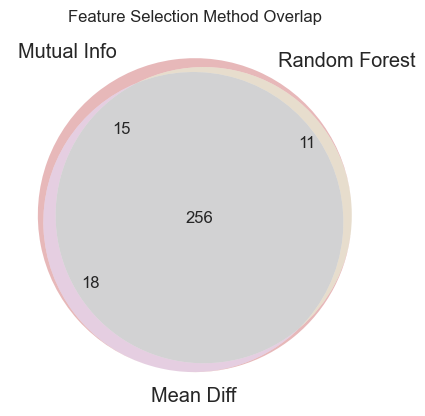

In [343]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

venn3(
    [set(selected_mi_features), set(selected_rf_features), set(selected_md_features)],
    set_labels=('Mutual Info', 'Random Forest', 'Mean Diff')
)
plt.title("Feature Selection Method Overlap")
plt.show()

### The Venn diagram illustrates the overlap between three feature selection techniques: Mutual Information, Random Forest importance, and Cross-Class Mean Difference. A total of 256 features were consistently identified as important across all three methods. These features represent the most robust subset, having demonstrated both statistical relevance and model-based significance. We retained only these overlapping features to construct a compact yet highly informative feature set for downstream modeling.

## 3. 处理类别不均衡

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_selected, y_train, test_size=0.3, stratify=y_train, random_state=42
)

###  3.1 baseline - Plain XGBoost (No Balancing)


 Evaluation Metrics on Validation Set:
Accuracy:             0.7527
F1 Macro:             0.3899
F1 Weighted:          0.7240
Log Loss:             1.0131
Weighted Log Loss:    0.0098
📋 分类报告（未做类别平衡）：
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.50      0.05      0.09        20
           4       0.61      0.52      0.56        71
           5       0.87      0.98      0.92      1344
           6       0.87      0.87      0.87       166
           7       0.58      0.23      0.33        31
           8       0.69      0.74      0.72       155
           9       0.00      0.00      0.00         8
          10       0.68      0.86      0.76       324
          11       0.57      0.57      0.57        23
          12       0.50      0.58      0.54       137
          13       0.00      0.00      0.0

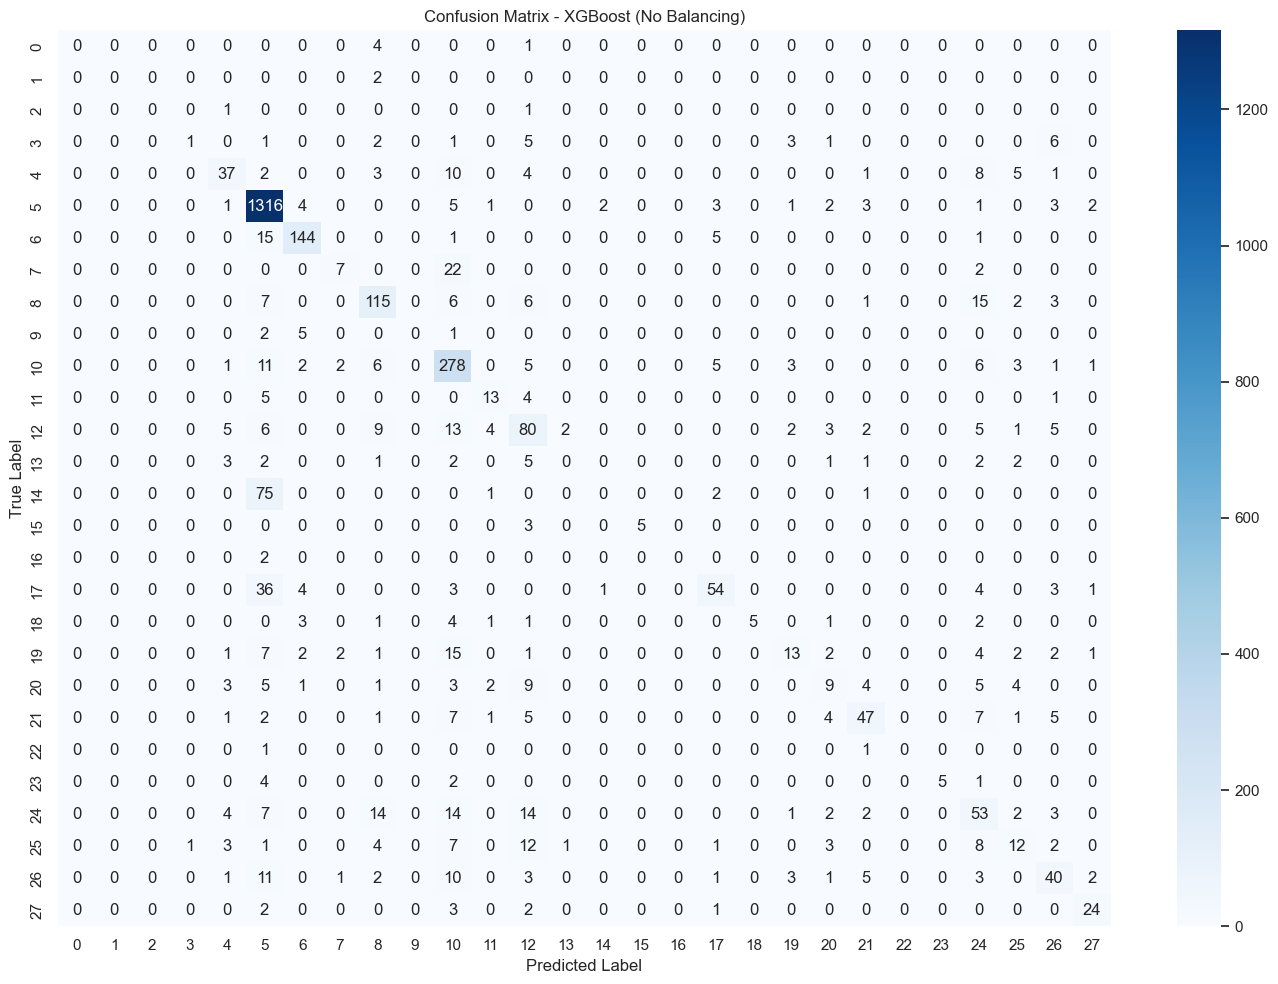

In [337]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
# 初始化模型（不做类别平衡）
clf_xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=28,
    eval_metric='mlogloss',
    random_state=42
)

# 拟合模型（不传 sample_weight）
clf_xgb.fit(x_train_split, y_train_split)

# 验证集预测
y_pred = clf_xgb.predict(x_val_split)
y_pred_proba = clf_xgb.predict_proba(x_val_split)
classes = np.unique(y_train_split)
y_val_ohe = label_binarize(y_val_split, classes=classes)

# 7. Define custom Weighted Log Loss function
def weighted_log_loss(y_true, y_pred):
    class_counts = np.sum(y_true, axis=0)
    class_weights = 1.0 / class_counts
    class_weights /= np.sum(class_weights)  # Normalize weights
    sample_weights = np.sum(y_true * class_weights, axis=1)
    loss = -np.mean(sample_weights * np.sum(y_true * np.log(y_pred + 1e-15), axis=1))
    return loss

# 8. Calculate evaluation metrics
acc_val = accuracy_score(y_val_split, y_pred)
f1_macro = f1_score(y_val_split, y_pred, average='macro', zero_division=0)
f1_weighted = f1_score(y_val_split, y_pred, average='weighted', zero_division=0)
log_loss_val = log_loss(y_val_ohe, y_pred_proba)
loss_val = weighted_log_loss(y_val_ohe, y_pred_proba)

# 9. Display evaluation results
print("\n Evaluation Metrics on Validation Set:")
print(f"{'Accuracy:':<22}{acc_val:.4f}")
print(f"{'F1 Macro:':<22}{f1_macro:.4f}")
print(f"{'F1 Weighted:':<22}{f1_weighted:.4f}")
print(f"{'Log Loss:':<22}{log_loss_val:.4f}")
print(f"{'Weighted Log Loss:':<22}{loss_val:.4f}")

# 输出分类报告
print("📋 分类报告（未做类别平衡）：")
print(classification_report(y_val_split, y_pred, zero_division=0))

# 混淆矩阵可视化
conf_matrix = confusion_matrix(y_val_split, y_pred)
plt.figure(figsize=(14, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost (No Balancing)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()